In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## **Data Description :** 

In [2]:
df = pd.read_csv('D:/Capstone/Loan/accepted_2007_to_2018Q4.csv',low_memory=False)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(2260701, 151)

In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 151 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   id                                          object 
 1   member_id                                   float64
 2   loan_amnt                                   float64
 3   funded_amnt                                 float64
 4   funded_amnt_inv                             float64
 5   term                                        object 
 6   int_rate                                    float64
 7   installment                                 float64
 8   grade                                       object 
 9   sub_grade                                   object 
 10  emp_title                                   object 
 11  emp_length                                  object 
 12  home_ownership                              object 
 13  annual_inc                

***This dataset has 113 float type features and 38 object features.***

## **Data Cleaning**

In [5]:
pd.set_option('display.max_rows',151)
def missing_check(data):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
    missing_perc = pd.concat([total,percent],axis=1,keys=['total','percent'])
    return missing_perc
missing_check(df)

,total,percent
member_id,2260701,100.000000
orig_projected_additional_accrued_interest,2252050,99.617331
hardship_loan_status,2249784,99.517097
hardship_dpd,2249784,99.517097
hardship_reason,2249784,99.517097
hardship_status,2249784,99.517097
deferral_term,2249784,99.517097
hardship_amount,2249784,99.517097
hardship_start_date,2249784,99.517097
hardship_end_date,2249784,99.517097


In [6]:
pct_null = df.isnull().sum() / len(df)
missing_features = list(pct_null[pct_null > 0.40].index)
df.drop(missing_features, axis=1, inplace=True)

***Removing features that has more than 40% null values. These features can be dropped as it will add noise and won't help in analysis.***

In [7]:
print('Number of features with more than 40% null values :',len(missing_features))

Number of features with more than 40% null values : 46


In [8]:
df.shape

(2260701, 105)

In [9]:
pd.set_option('display.max_rows',151)
def missing_check(data):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
    missing_perc = pd.concat([total,percent],axis=1,keys=['total','percent'])
    return missing_perc
missing_check(df)

,total,percent
all_util,866381,38.323555
inq_last_12m,866163,38.313912
total_cu_tl,866163,38.313912
open_acc_6m,866163,38.313912
total_bal_il,866162,38.313868
open_act_il,866162,38.313868
open_il_12m,866162,38.313868
open_il_24m,866162,38.313868
inq_fi,866162,38.313868
max_bal_bc,866162,38.313868


In [10]:
df.nunique().sort_values(ascending=False)

id                            2260701
url                           2260668
total_pymnt                   1633857
total_pymnt_inv               1311099
last_pymnt_amnt                704467
total_rec_int                  635921
tot_hi_cred_lim                529972
emp_title                      512694
tot_cur_bal                    487688
total_rec_prncp                486463
out_prncp_inv                  368481
out_prncp                      356141
total_bal_ex_mort              212777
total_il_high_credit_limit     194137
total_bal_il                   162249
collection_recovery_fee        146222
recoveries                     132777
revol_bal                      102251
installment                     93301
bc_open_to_buy                  91500
annual_inc                      89368
avg_cur_bal                     88597
title                           63155
total_rev_hi_lim                34220
max_bal_bc                      33726
total_bc_limit                  20309
total_rec_la

In [11]:
df.drop(['id','url'],axis=1,inplace=True)

***We can see that these features has unique values, so we can drop them.***

1. id                            2260701
2. url                           2260668


In [12]:
df['zip_code'].value_counts()

112xx    23908
945xx    23782
750xx    23649
606xx    21192
300xx    20497
         ...  
817xx        1
892xx        1
568xx        1
552xx        1
888xx        1
Name: zip_code, Length: 956, dtype: int64

In [13]:
df.drop(['zip_code'],axis=1,inplace=True)

***We can remove ZipCode as it has only first 3 number***

In [14]:
df['policy_code'].value_counts()

1.0    2260668
Name: policy_code, dtype: int64

In [15]:
df.drop(['policy_code'],axis=1,inplace=True)

***Since, policy code has only single value we can remove this feature.***

In [16]:
df['title'].value_counts().head()

Debt consolidation         1153293
Credit card refinancing     469691
Home improvement            137437
Other                       127714
Major purchase               44840
Name: title, dtype: int64

In [17]:
df.drop('title',axis=1,inplace=True)

***We can remove title feature as it is the duplicate of purpose feature.***

In [18]:
df[['last_fico_range_high','last_fico_range_low']].head()

,last_fico_range_high,last_fico_range_low
0,564.0,560.0
1,699.0,695.0
2,704.0,700.0
3,679.0,675.0
4,704.0,700.0


In [19]:
df.drop(['last_fico_range_high','last_fico_range_low'],axis=1,inplace=True)

***Last fico score pulled is not required as we have latest fico score range column separately.*** 

In [20]:
df[['all_util','inq_last_12m','total_cu_tl','open_acc_6m','total_bal_il','open_act_il',
   'open_il_12m','open_il_24m','inq_fi','max_bal_bc','open_rv_12m','open_rv_24m']]

,all_util,inq_last_12m,total_cu_tl,open_acc_6m,total_bal_il,open_act_il,open_il_12m,open_il_24m,inq_fi,max_bal_bc,open_rv_12m,open_rv_24m
0,34.0,4.0,1.0,2.0,4981.0,2.0,0.0,1.0,3.0,722.0,3.0,3.0
1,29.0,6.0,0.0,1.0,18005.0,1.0,0.0,1.0,0.0,6472.0,2.0,3.0
2,65.0,1.0,5.0,0.0,10827.0,1.0,0.0,4.0,2.0,2081.0,0.0,2.0
3,45.0,0.0,1.0,1.0,12609.0,1.0,0.0,1.0,0.0,6987.0,1.0,1.0
4,78.0,3.0,1.0,1.0,73839.0,3.0,0.0,3.0,2.0,9702.0,4.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2260696,51.0,2.0,0.0,0.0,19765.0,2.0,0.0,1.0,3.0,5141.0,0.0,0.0
2260697,73.0,1.0,0.0,0.0,44785.0,2.0,0.0,2.0,0.0,6172.0,1.0,5.0
2260698,84.0,2.0,1.0,0.0,32071.0,1.0,1.0,2.0,3.0,4093.0,0.0,1.0
2260699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df.drop(['all_util','inq_last_12m','total_cu_tl','open_acc_6m','total_bal_il','open_act_il',
   'open_il_12m','open_il_24m','inq_fi','max_bal_bc','open_rv_12m','open_rv_24m'],axis=1,inplace=True)

***Removing these features as it all based on trades, credits and revolving account balance.*** 

In [22]:
df.drop('mths_since_recent_inq',axis=1,inplace=True)

***Since, it is just about recent inquiry we can drop it.*** 

In [23]:
missing_check(df)

,total,percent
emp_title,167002,7.387178
num_tl_120dpd_2m,153690,6.798334
emp_length,146940,6.499754
mo_sin_old_il_acct,139104,6.153136
bc_util,76104,3.366389
percent_bc_gt_75,75412,3.335779
bc_open_to_buy,74968,3.316140
mths_since_recent_bc,73445,3.248771
pct_tl_nvr_dlq,70464,3.116909
avg_cur_bal,70379,3.113149


In [24]:
a = df['loan_status'].value_counts(normalize=True)*100
a

Fully Paid                                             47.629771
Current                                                38.852100
Charged Off                                            11.879630
Late (31-120 days)                                      0.949587
In Grace Period                                         0.373164
Late (16-30 days)                                       0.192377
Does not meet the credit policy. Status:Fully Paid      0.087939
Does not meet the credit policy. Status:Charged Off     0.033663
Default                                                 0.001769
Name: loan_status, dtype: float64

In [25]:
df1 = df.dropna(axis=0)

In [26]:
df1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,...,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,...,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
2,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,...,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N
3,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,...,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,N,Cash,N
4,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,...,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N


In [27]:
df1.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
fico_range_low                0
fico_range_high               0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prnc

In [28]:
b = df1['loan_status'].value_counts(normalize=True)*100
b

Fully Paid            47.588933
Current               39.512012
Charged Off           11.414750
Late (31-120 days)     0.922965
In Grace Period        0.376009
Late (16-30 days)      0.183727
Default                0.001604
Name: loan_status, dtype: float64

In [29]:
target = pd.DataFrame(data=[a,b]).T
target

,loan_status,loan_status
Fully Paid,47.629771,47.588933
Current,38.852100,39.512012
Charged Off,11.879630,11.414750
Late (31-120 days),0.949587,0.922965
In Grace Period,0.373164,0.376009
Late (16-30 days),0.192377,0.183727
Does not meet the credit policy. Status:Fully Paid,0.087939,NaN
Does not meet the credit policy. Status:Charged Off,0.033663,NaN
Default,0.001769,0.001604


***From the above dataframe we can that there is no much difference in removing the rows that have null values as it does not affect our classes in target variable.*** 

In [30]:
df1.shape

(1870168, 85)

In [31]:
df_final = df1[df1['loan_status'].isin(['Fully Paid','Charged Off'])]

In [32]:
df_final.shape

(1103468, 85)

***Final shape of the dataset with required classes for our target variable.*** 

## **Saving the dataset :**

In [33]:
#df_final.to_csv('Accepted_loan_with_85cols.csv',index=False)

## **Dataset Description with 85 features :**

In [34]:
data = pd.read_csv('D:/Capstone/Loan/Accepted_loan_with_85cols.csv',low_memory =False)
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,...,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,...,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
2,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,...,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N
3,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,...,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N
4,11950.0,11950.0,11950.0,36 months,13.44,405.18,C,C3,Veterinary Tecnician,4 years,...,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0,N,Cash,N


In [35]:
print(f'{data.shape[0]}-rows and {data.shape[1]}-columns')

1103468-rows and 85-columns


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103468 entries, 0 to 1103467
Data columns (total 85 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   loan_amnt                   1103468 non-null  float64
 1   funded_amnt                 1103468 non-null  float64
 2   funded_amnt_inv             1103468 non-null  float64
 3   term                        1103468 non-null  object 
 4   int_rate                    1103468 non-null  float64
 5   installment                 1103468 non-null  float64
 6   grade                       1103468 non-null  object 
 7   sub_grade                   1103468 non-null  object 
 8   emp_title                   1103468 non-null  object 
 9   emp_length                  1103468 non-null  object 
 10  home_ownership              1103468 non-null  object 
 11  annual_inc                  1103468 non-null  float64
 12  verification_status         1103468 non-null  object 
 1

In [37]:
data.isna().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
fico_range_low                0
fico_range_high               0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prnc

## **Data Preprocessing :**

In [38]:
for i in data.columns:
    print(data[i].value_counts(normalize=True),'\n')

10000.0    7.350553e-02
12000.0    5.544067e-02
20000.0    5.452990e-02
15000.0    5.354936e-02
35000.0    3.961148e-02
               ...     
36275.0    9.062338e-07
39400.0    9.062338e-07
38175.0    9.062338e-07
39325.0    9.062338e-07
38725.0    9.062338e-07
Name: loan_amnt, Length: 1548, dtype: float64 

10000.0    7.350553e-02
12000.0    5.544067e-02
20000.0    5.452899e-02
15000.0    5.354936e-02
35000.0    3.961148e-02
               ...     
36275.0    9.062338e-07
39400.0    9.062338e-07
38175.0    9.062338e-07
39325.0    9.062338e-07
38725.0    9.062338e-07
Name: funded_amnt, Length: 1548, dtype: float64 

10000.000000    6.981716e-02
12000.000000    5.206041e-02
20000.000000    4.961811e-02
15000.000000    4.952024e-02
35000.000000    3.415051e-02
                    ...     
35850.000000    9.062338e-07
19721.292476    9.062338e-07
38775.000000    9.062338e-07
39525.000000    9.062338e-07
36725.000000    9.062338e-07
Name: funded_amnt_inv, Length: 1590, dtype: float64 

 

9.0     8.855445e-02
10.0    8.765637e-02
8.0     8.346504e-02
11.0    8.182929e-02
12.0    7.409368e-02
7.0     7.307416e-02
13.0    6.503496e-02
6.0     5.821555e-02
14.0    5.572250e-02
15.0    4.687857e-02
5.0     4.003832e-02
16.0    3.947917e-02
17.0    3.261989e-02
18.0    2.694505e-02
19.0    2.234863e-02
4.0     2.212298e-02
20.0    1.783377e-02
21.0    1.433299e-02
22.0    1.179916e-02
23.0    9.547173e-03
3.0     8.591096e-03
24.0    7.631395e-03
25.0    6.191389e-03
26.0    4.582824e-03
27.0    3.807088e-03
28.0    2.956135e-03
29.0    2.419644e-03
2.0     2.037214e-03
30.0    1.925747e-03
31.0    1.517942e-03
32.0    1.253321e-03
33.0    1.082949e-03
34.0    7.929546e-04
35.0    6.606444e-04
36.0    5.156470e-04
37.0    4.132426e-04
38.0    3.507125e-04
39.0    2.945260e-04
40.0    2.093400e-04
41.0    1.966527e-04
1.0     1.812468e-04
42.0    1.712782e-04
43.0    1.087481e-04
44.0    7.702987e-05
45.0    7.702987e-05
46.0    6.071766e-05
47.0    4.712416e-05
48.0    3.443

Aug-2018    0.030355
Mar-2018    0.029922
Oct-2018    0.028369
Jul-2018    0.028260
Jun-2018    0.027231
Feb-2019    0.026826
May-2018    0.025968
Jan-2018    0.025926
Mar-2017    0.025457
Aug-2017    0.025064
Oct-2017    0.024971
Apr-2018    0.024853
Nov-2017    0.024361
Feb-2018    0.024267
Jan-2019    0.024262
Sep-2018    0.024114
Nov-2018    0.024077
Jul-2017    0.023635
Jun-2017    0.023283
May-2017    0.022424
Dec-2018    0.021372
Sep-2017    0.020898
Dec-2017    0.020761
Apr-2017    0.020137
Jan-2017    0.019495
Feb-2017    0.019021
Dec-2016    0.018554
Oct-2016    0.017962
Nov-2016    0.017711
Aug-2016    0.017424
Sep-2016    0.017365
Jul-2016    0.016988
Mar-2016    0.016195
Jun-2016    0.015901
Mar-2019    0.014793
May-2016    0.014093
Apr-2016    0.013615
Feb-2016    0.013501
Oct-2015    0.012304
Dec-2015    0.012211
Jan-2016    0.012035
Sep-2015    0.010633
Nov-2015    0.010471
Jul-2015    0.010212
Aug-2015    0.009083
Jun-2015    0.008377
May-2015    0.007816
Apr-2015    0

3.0      4.945318e-02
2.0      4.880160e-02
4.0      4.702266e-02
5.0      4.396956e-02
6.0      4.105148e-02
             ...     
440.0    9.062338e-07
444.0    9.062338e-07
447.0    9.062338e-07
449.0    9.062338e-07
500.0    9.062338e-07
Name: mths_since_recent_bc, Length: 449, dtype: float64 

0.0     7.557917e-01
1.0     1.294863e-01
2.0     5.275731e-02
3.0     2.411035e-02
4.0     1.423965e-02
5.0     8.456068e-03
6.0     5.354936e-03
7.0     3.330409e-03
8.0     2.071650e-03
9.0     1.410100e-03
10.0    9.606078e-04
11.0    5.546151e-04
12.0    4.485857e-04
13.0    2.582766e-04
14.0    2.446831e-04
15.0    1.150917e-04
16.0    9.606078e-05
17.0    6.887377e-05
18.0    5.074909e-05
19.0    2.809325e-05
20.0    2.809325e-05
23.0    2.356208e-05
21.0    2.265585e-05
22.0    1.903091e-05
24.0    1.631221e-05
25.0    1.087481e-05
26.0    9.062338e-06
28.0    6.343637e-06
29.0    6.343637e-06
27.0    5.437403e-06
31.0    4.531169e-06
30.0    2.718701e-06
34.0    2.718701e-06
33.0   

0.0     9.456423e-01
1.0     4.087114e-02
2.0     8.031044e-03
3.0     2.155024e-03
4.0     1.229759e-03
5.0     6.379886e-04
6.0     4.748665e-04
7.0     2.573704e-04
8.0     1.948403e-04
9.0     1.459036e-04
10.0    1.051231e-04
11.0    7.431117e-05
12.0    4.893663e-05
13.0    3.353065e-05
14.0    3.262442e-05
15.0    1.631221e-05
16.0    1.268727e-05
18.0    1.178104e-05
20.0    7.249870e-06
19.0    4.531169e-06
17.0    2.718701e-06
22.0    2.718701e-06
26.0    1.812468e-06
29.0    9.062338e-07
21.0    9.062338e-07
24.0    9.062338e-07
25.0    9.062338e-07
39.0    9.062338e-07
30.0    9.062338e-07
Name: num_tl_90g_dpd_24m, dtype: float64 

1.0     2.473076e-01
2.0     2.289799e-01
3.0     1.657130e-01
0.0     1.650877e-01
4.0     9.727876e-02
5.0     4.642455e-02
6.0     2.263772e-02
7.0     1.222056e-02
8.0     6.252107e-03
9.0     3.496250e-03
10.0    1.861404e-03
11.0    1.076606e-03
12.0    6.334574e-04
13.0    3.706496e-04
14.0    2.437769e-04
15.0    1.395600e-04
16.0    9.51

In [39]:
data.drop(['out_prncp', 'out_prncp_inv','pymnt_plan','hardship_flag'],axis=1,inplace=True)

***Removing the above variables as it has only one value.*** 

In [40]:
data.drop(['earliest_cr_line','last_pymnt_d','last_credit_pull_d'],axis=1,inplace=True)

***Removing the above variables as it is redundant.*** 

In [41]:
data['issue_d'] = pd.to_datetime(data['issue_d'])

In [42]:
data['issue_d_month'] = pd.to_datetime(data['issue_d']).dt.month

In [43]:
data['issue_d_month'] = data['issue_d_month'].astype(object)

In [44]:
data['issue_d_month'].value_counts()

10    114528
7     105357
3     102929
11     93920
1      93628
8      90122
4      89362
12     85841
5      84924
2      84848
6      82199
9      75810
Name: issue_d_month, dtype: int64

In [45]:
data['issue_d_year'] = pd.to_datetime(data['issue_d']).dt.year

In [46]:
data['issue_d_year'] = data['issue_d_year'].astype(object)

In [47]:
data['issue_d_year'].value_counts()

2015    323865
2016    251277
2014    195126
2017    143109
2013    120419
2018     46812
2012     22860
Name: issue_d_year, dtype: int64

In [48]:
data.drop(['issue_d'],axis=1,inplace=True)

***Removing issue_d variable as we have separated year and month and stored as new variables in the dataframe.*** 

In [49]:
data['emp_length'].value_counts()

10+ years    390334
2 years      105728
3 years       93264
< 1 year      92816
1 year        76659
5 years       71810
4 years       68620
6 years       53888
8 years       53503
7 years       51856
9 years       44990
Name: emp_length, dtype: int64

In [50]:
emp_length_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}

In [51]:
data['emp_length'] = data["emp_length"].map(emp_length_dict)

In [52]:
data['emp_length'] = data['emp_length'].astype('object')

In [53]:
data['emp_length'].dtype

dtype('O')

In [54]:
data['emp_length'].value_counts()

10    390334
2     105728
3      93264
0      92816
1      76659
5      71810
4      68620
6      53888
8      53503
7      51856
9      44990
Name: emp_length, dtype: int64

<b><i>According to the data_dictionary file description for this field,

emp_length: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

We have converted the column with values between 0 and 10. 
  </b></i>

In [55]:
data['term'] = data['term'].apply(lambda x : x.split()[0])

In [56]:
data['term'].value_counts()

36    826268
60    277200
Name: term, dtype: int64

In [57]:
data['total_pymnt']

0           4421.723917
1          25679.660000
2          22705.924294
3          11740.500000
4          13708.948530
               ...     
1103463    29818.871195
1103464    35848.764532
1103465     3737.940000
1103466    18660.607569
1103467     6755.400000
Name: total_pymnt, Length: 1103468, dtype: float64

In [58]:
data['total_pymnt'] = round(data['total_pymnt'],2)

In [59]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag,issue_d_month,issue_d_year
0,3600.0,3600.0,3600.0,36,13.99,123.03,C,C4,leadman,10,...,0.0,0.0,178050.0,7746.0,2400.0,13734.0,Cash,N,12,2015
1,24700.0,24700.0,24700.0,36,11.99,820.28,C,C1,Engineer,10,...,0.0,0.0,314017.0,39475.0,79300.0,24667.0,Cash,N,12,2015
2,20000.0,20000.0,20000.0,60,10.78,432.66,B,B4,truck driver,10,...,0.0,0.0,218418.0,18696.0,6200.0,14877.0,Cash,N,12,2015
3,10400.0,10400.0,10400.0,60,22.45,289.91,F,F1,Contract Specialist,3,...,0.0,0.0,439570.0,95768.0,20300.0,88097.0,Cash,N,12,2015
4,11950.0,11950.0,11950.0,36,13.44,405.18,C,C3,Veterinary Tecnician,4,...,0.0,0.0,16900.0,12798.0,9400.0,4000.0,Cash,N,12,2015


## Exploratory Data Analysis :

In [60]:
df_cat = data.select_dtypes(include='object').drop('loan_status',axis=1)
df_cat.head()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,purpose,addr_state,initial_list_status,application_type,disbursement_method,debt_settlement_flag,issue_d_month,issue_d_year
0,36,C,C4,leadman,10,MORTGAGE,Not Verified,debt_consolidation,PA,w,Individual,Cash,N,12,2015
1,36,C,C1,Engineer,10,MORTGAGE,Not Verified,small_business,SD,w,Individual,Cash,N,12,2015
2,60,B,B4,truck driver,10,MORTGAGE,Not Verified,home_improvement,IL,w,Joint App,Cash,N,12,2015
3,60,F,F1,Contract Specialist,3,MORTGAGE,Source Verified,major_purchase,PA,w,Individual,Cash,N,12,2015
4,36,C,C3,Veterinary Tecnician,4,RENT,Source Verified,debt_consolidation,GA,w,Individual,Cash,N,12,2015


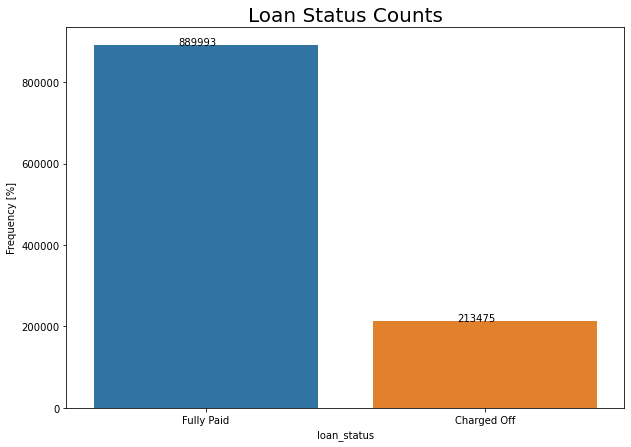

In [61]:
plt.figure(figsize=(10,7))
ax = sns.countplot(x='loan_status', data=data)
plt.title('Loan Status Counts',color='black',fontsize=20)
plt.ylabel('Frequency [%]')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+5))

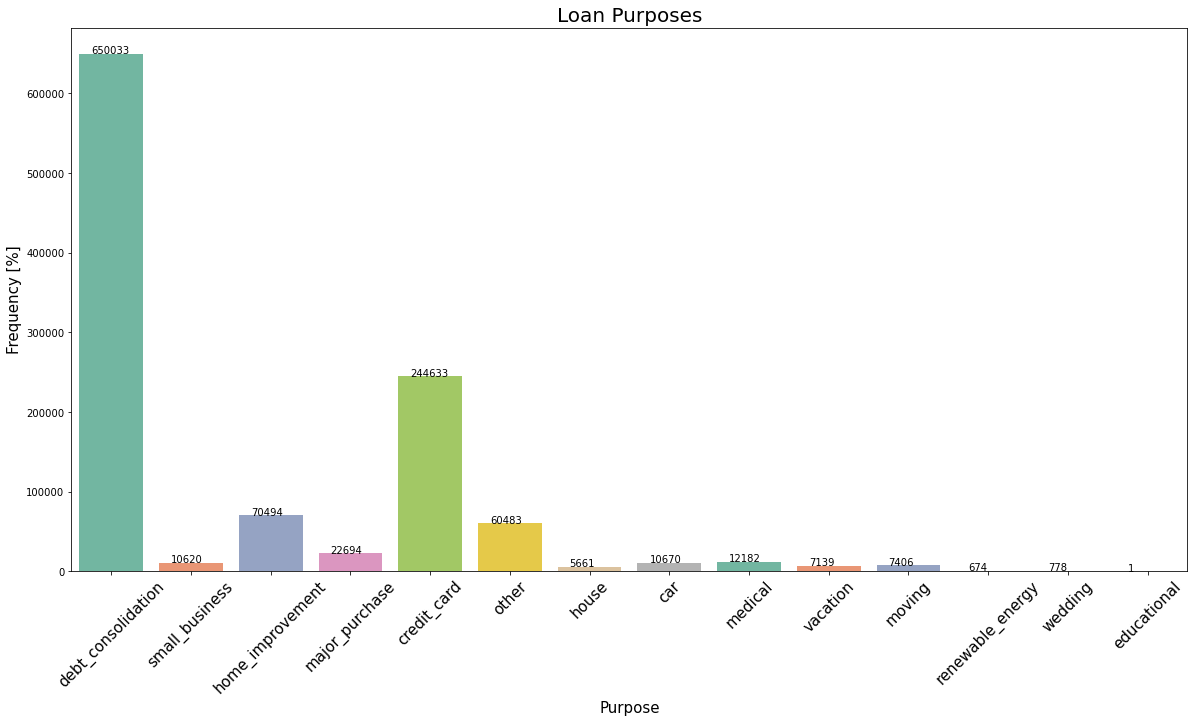

In [62]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='purpose', data=data,palette='Set2')
plt.title('Loan Purposes',color='black',fontsize=20)
plt.xlabel('Purpose',fontsize=15)
plt.ylabel('Frequency [%]',fontsize=15)
plt.xticks(rotation=45,fontsize=15)

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+5))

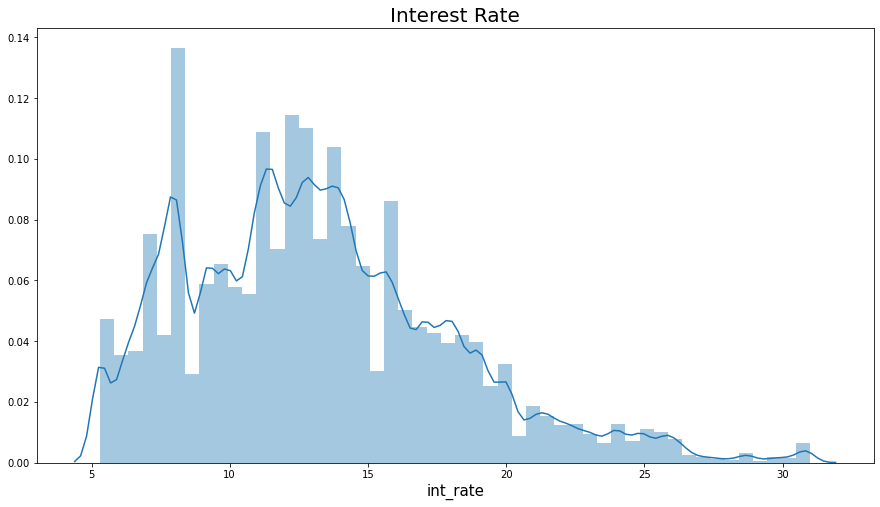

In [63]:
# Interest Rate
plt.figure(figsize=(15,8))
plt.title('Interest Rate',color='black',fontsize=20)
plt.xlabel('int_rate',fontsize=15)
sns.distplot(data['int_rate'])
plt.show()

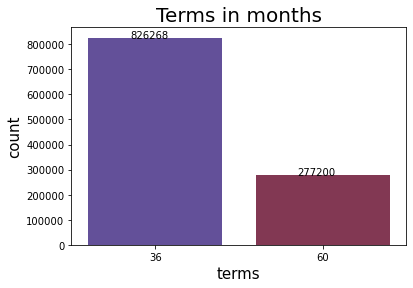

In [64]:
# Loan Term 
ax = sns.countplot(data['term'],palette='twilight')
plt.title('Terms in months',color='black',fontsize=20)
plt.xlabel('terms',fontsize=15)
plt.ylabel('count',fontsize=15)

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+4))

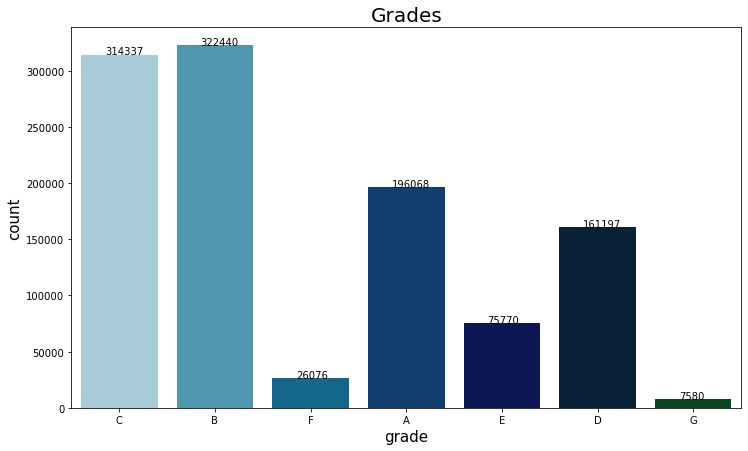

In [65]:
plt.figure(figsize=(12,7))
ax = sns.countplot(data['grade'],palette='ocean_r')
plt.title('Grades',color='black',fontsize=20)
plt.xlabel('grade',fontsize=15)
plt.ylabel('count',fontsize=15)

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+4))

Text(0.5, 0.98, 'Sub Grades vs Grades vs Interest Rate')

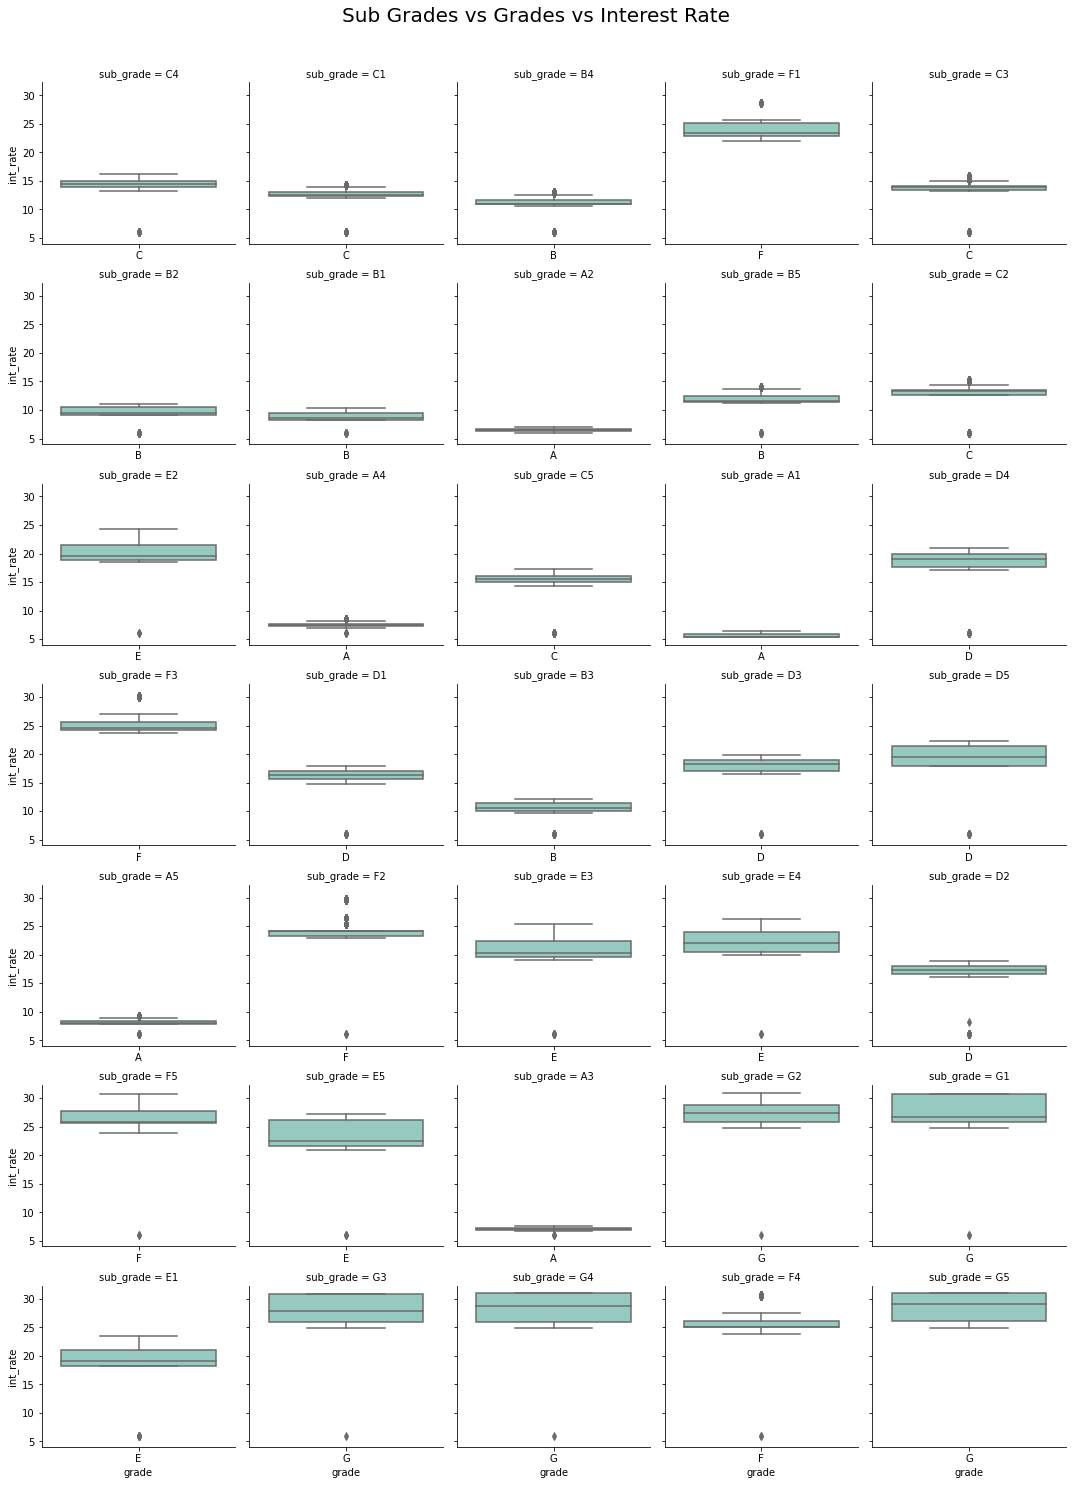

In [66]:
a = sns.FacetGrid(data,col='sub_grade',col_wrap=5,sharex=False)
a.map(sns.boxplot,'grade','int_rate',palette='Set3')
plt.subplots_adjust(top=0.93)
a.fig.suptitle('Sub Grades vs Grades vs Interest Rate',fontsize=20) # can also get the figure from plt.gcf()


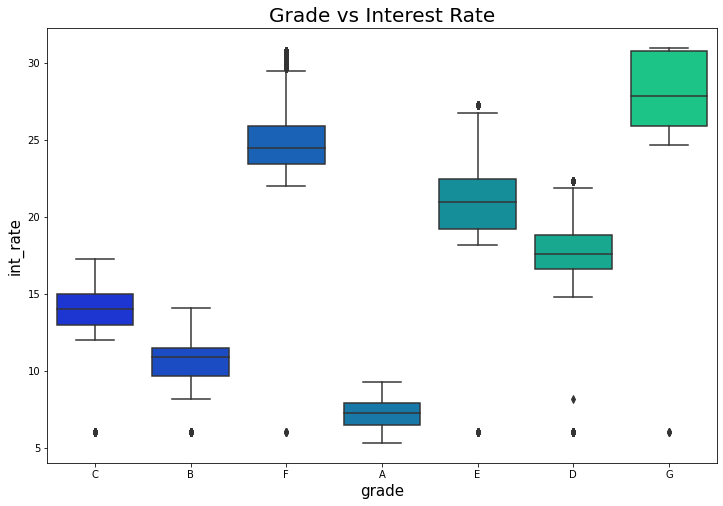

In [67]:
plt.figure(figsize=(12,8))
sns.boxplot(x=data['grade'],y=data['int_rate'],palette='winter')
plt.xlabel('grade',fontsize=15)
plt.ylabel('int_rate',fontsize=15)
plt.title('Grade vs Interest Rate',fontsize=20)
plt.show()

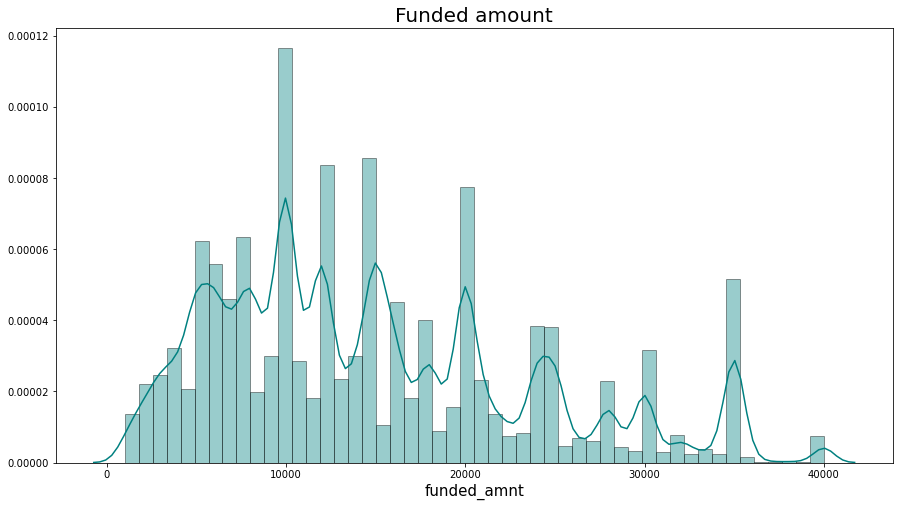

In [68]:
# Interest Rate
plt.figure(figsize=(15,8))
plt.title('Funded amount',color='black',fontsize=20)
plt.xlabel('funded_amnt',fontsize=15)
_=sns.distplot(data['funded_amnt'],color='teal',hist_kws={'edgecolor':'black'})

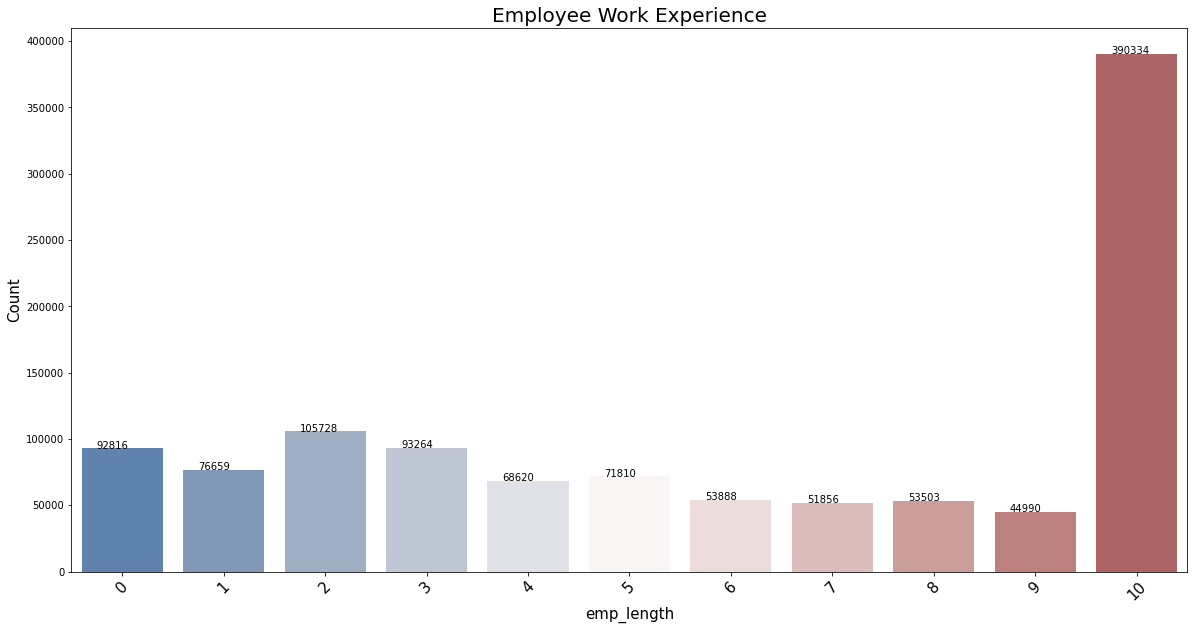

In [69]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='emp_length', data=data,palette='vlag')
plt.title('Employee Work Experience',color='black',fontsize=20)
plt.xlabel('emp_length',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(rotation=45,fontsize=15)

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+5))

In [70]:
df_cat = data.select_dtypes(include='object').drop('loan_status',axis=1)

In [71]:
a = pd.crosstab(data['loan_status'],df_cat['grade'],margins=True,margins_name='Total').T
a

loan_status,Charged Off,Fully Paid,Total
grade,,,
A,10767,185301,196068
B,40831,281609,322440
C,68782,245555,314337
D,48330,112867,161197
E,29175,46595,75770
F,11794,14282,26076
G,3796,3784,7580
Total,213475,889993,1103468


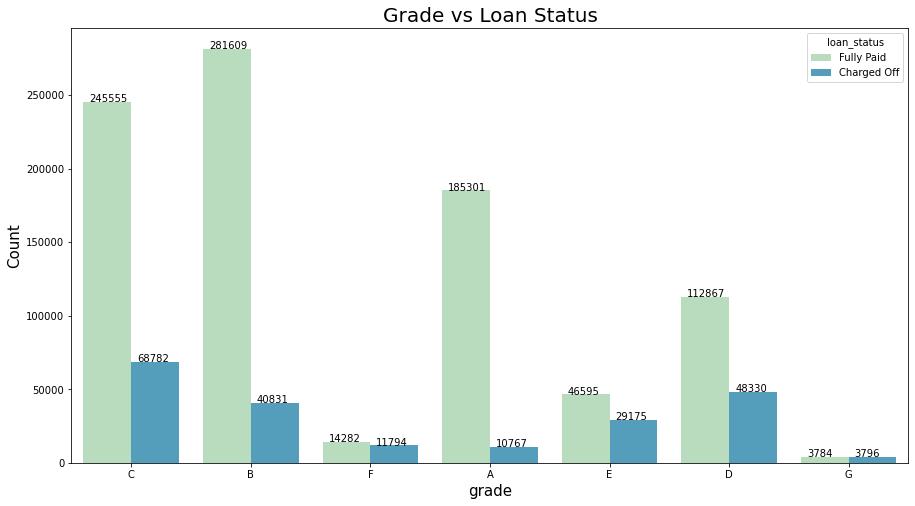

In [72]:
plt.figure(figsize=(15,8))
ax = sns.countplot(hue='loan_status',x='grade',data=data,palette='GnBu')
plt.title('Grade vs Loan Status',color='black',fontsize=20)
plt.xlabel('grade',fontsize=15)
plt.ylabel('Count',fontsize=15)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+15))

In [73]:
b = pd.crosstab(data['loan_status'],df_cat['verification_status'],margins=True,margins_name='Total')
b

verification_status,Not Verified,Source Verified,Verified,Total
loan_status,,,,
Charged Off,46862,95444,71169,213475
Fully Paid,287452,364877,237664,889993
Total,334314,460321,308833,1103468


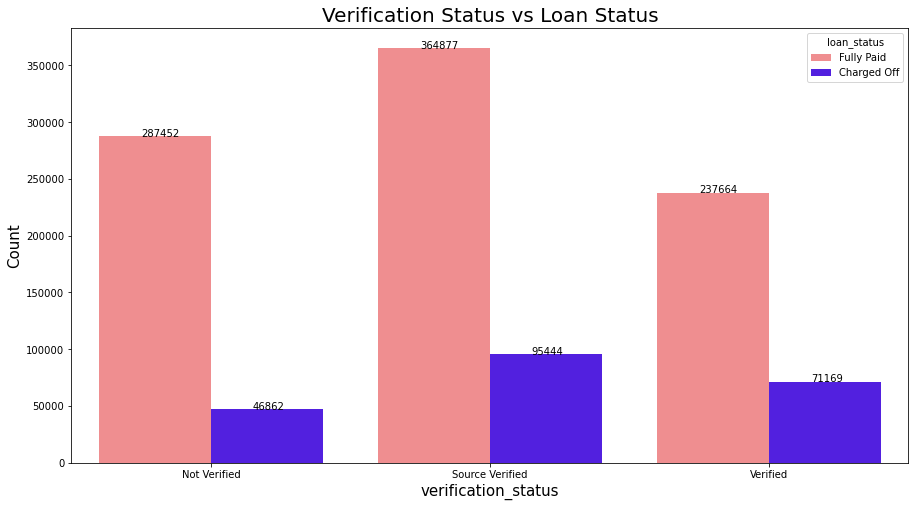

In [74]:
plt.figure(figsize=(15,8))
ax = sns.countplot(hue='loan_status',x='verification_status',data=data,palette='gnuplot2_r')
plt.title('Verification Status vs Loan Status',color='black',fontsize=20)
plt.xlabel('verification_status',fontsize=15)
plt.ylabel('Count',fontsize=15)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+15))

In [75]:
c = pd.crosstab(data['loan_status'],df_cat['home_ownership'],margins=True,margins_name='Total').T
c

loan_status,Charged Off,Fully Paid,Total
home_ownership,,,
ANY,43,188,231
MORTGAGE,92442,463408,555850
NONE,6,33,39
OTHER,8,31,39
OWN,22251,91415,113666
RENT,98725,334918,433643
Total,213475,889993,1103468


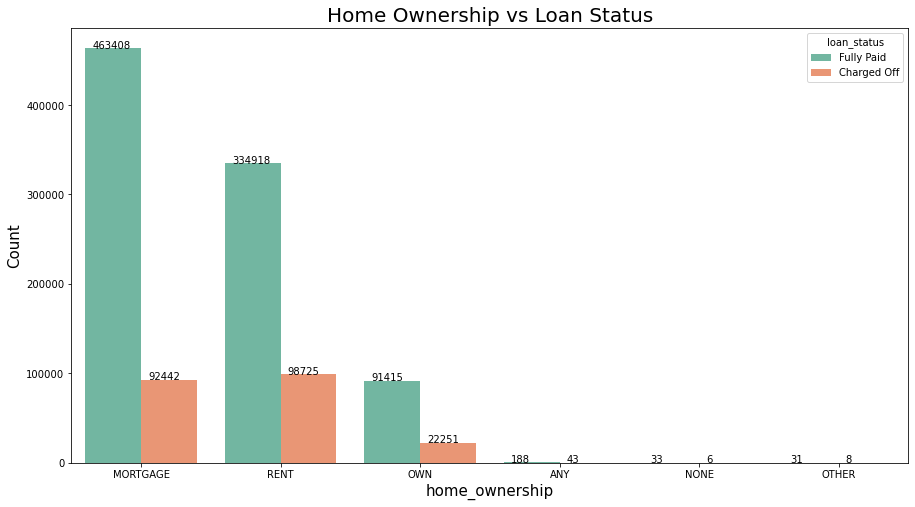

In [76]:
plt.figure(figsize=(15,8))
ax = sns.countplot(hue='loan_status',x='home_ownership',data=data,palette='Set2')
plt.title('Home Ownership vs Loan Status',color='black',fontsize=20)
plt.xlabel('home_ownership',fontsize=15)
plt.ylabel('Count',fontsize=15)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+15))

In [77]:
b = pd.crosstab(data['loan_status'],df_cat['purpose'],margins=True,margins_name='Total').T
b

loan_status,Charged Off,Fully Paid,Total
purpose,,,
car,1542,9128,10670
credit_card,39747,204886,244633
debt_consolidation,133262,516771,650033
educational,0,1,1
home_improvement,12087,58407,70494
house,1219,4442,5661
major_purchase,4214,18480,22694
medical,2522,9660,12182
moving,1699,5707,7406


In [78]:
b = pd.crosstab(data['loan_status'],df_cat['application_type'],margins=True,margins_name='Total')
b

application_type,Individual,Joint App,Total
loan_status,,,
Charged Off,208705,4770,213475
Fully Paid,873871,16122,889993
Total,1082576,20892,1103468


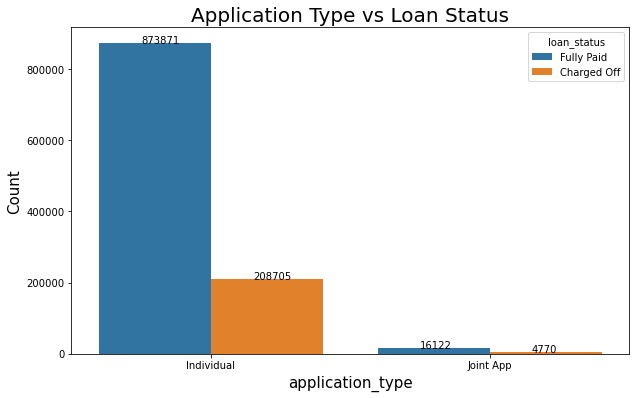

In [79]:
plt.figure(figsize=(10,6))
ax = sns.countplot(hue='loan_status',x='application_type',data=data)
plt.title('Application Type vs Loan Status',color='black',fontsize=20)
plt.xlabel('application_type',fontsize=15)
plt.ylabel('Count',fontsize=15)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+15))

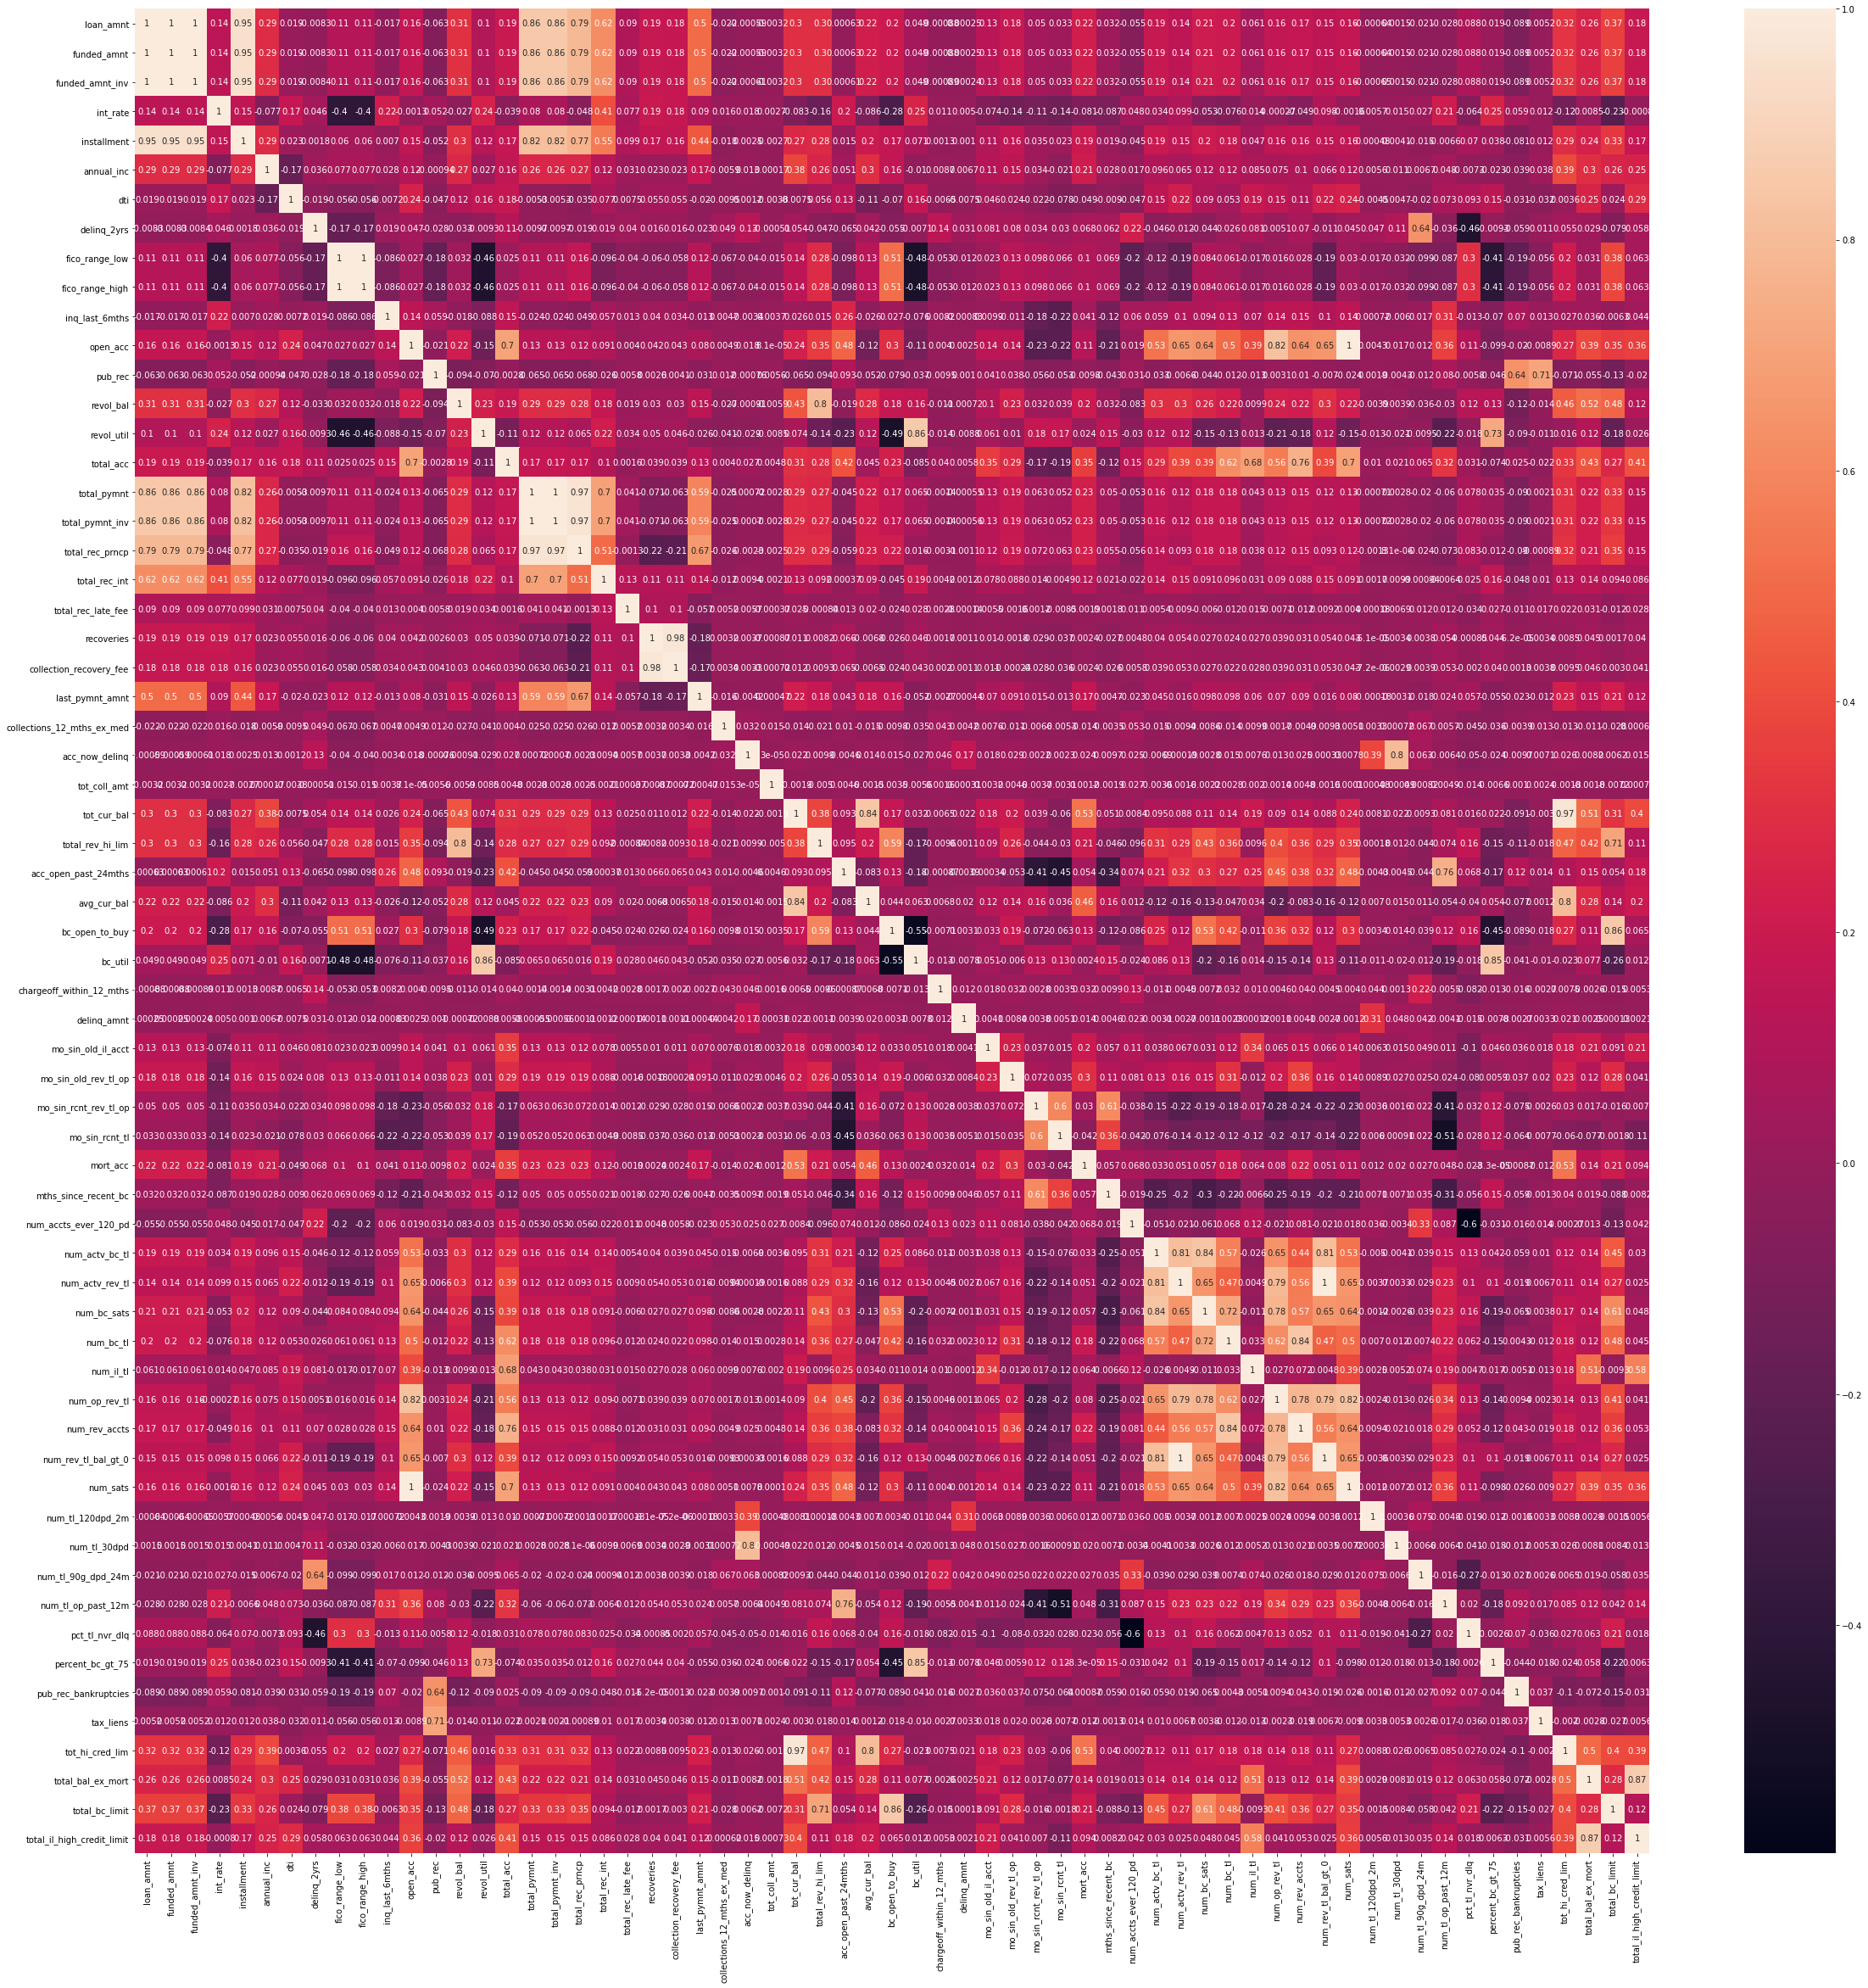

<Figure size 432x288 with 0 Axes>

In [80]:
plt.figure(figsize=(40,40))
sns.heatmap(data.corr(),annot=True)
plt.show()
plt.tight_layout()

## **Spliting data to Numerical and categorical columns:**

In [81]:
df_num = data.select_dtypes(include='number')
df_num.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,3600.0,3600.0,3600.0,13.99,123.03,55000.0,5.91,0.0,675.0,679.0,...,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0
1,24700.0,24700.0,24700.0,11.99,820.28,65000.0,16.06,1.0,715.0,719.0,...,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0
2,20000.0,20000.0,20000.0,10.78,432.66,63000.0,10.78,0.0,695.0,699.0,...,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0
3,10400.0,10400.0,10400.0,22.45,289.91,104433.0,25.37,1.0,695.0,699.0,...,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0
4,11950.0,11950.0,11950.0,13.44,405.18,34000.0,10.20,0.0,690.0,694.0,...,0.0,0.0,100.0,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0


In [82]:
df_cat = data.select_dtypes(include='object')
df_cat.head()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,loan_status,purpose,addr_state,initial_list_status,application_type,disbursement_method,debt_settlement_flag,issue_d_month,issue_d_year
0,36,C,C4,leadman,10,MORTGAGE,Not Verified,Fully Paid,debt_consolidation,PA,w,Individual,Cash,N,12,2015
1,36,C,C1,Engineer,10,MORTGAGE,Not Verified,Fully Paid,small_business,SD,w,Individual,Cash,N,12,2015
2,60,B,B4,truck driver,10,MORTGAGE,Not Verified,Fully Paid,home_improvement,IL,w,Joint App,Cash,N,12,2015
3,60,F,F1,Contract Specialist,3,MORTGAGE,Source Verified,Fully Paid,major_purchase,PA,w,Individual,Cash,N,12,2015
4,36,C,C3,Veterinary Tecnician,4,RENT,Source Verified,Fully Paid,debt_consolidation,GA,w,Individual,Cash,N,12,2015


## **Mannwhitneyu Test :**

In [83]:
for i in df_num.columns:
    full = df_num[df_cat['loan_status']=='Fully Paid'][i]
    charged = df_num[df_cat['loan_status']=='Charged Off'][i]
    tstat,pvalue = stats.mannwhitneyu(full,charged)
    if pvalue>0.05:
        print('It is not significant.')
        print('pvalue of',i,':',pvalue,'\n')
    else:
        print('It is significant.')
        print('pvalue of',i,':',pvalue,'\n')

It is significant.
pvalue of loan_amnt : 0.0 

It is significant.
pvalue of funded_amnt : 0.0 

It is significant.
pvalue of funded_amnt_inv : 0.0 

It is significant.
pvalue of int_rate : 0.0 

It is significant.
pvalue of installment : 0.0 

It is significant.
pvalue of annual_inc : 0.0 

It is significant.
pvalue of dti : 0.0 

It is significant.
pvalue of delinq_2yrs : 2.5018102801418175e-79 

It is significant.
pvalue of fico_range_low : 0.0 

It is significant.
pvalue of fico_range_high : 0.0 

It is significant.
pvalue of inq_last_6mths : 0.0 

It is significant.
pvalue of open_acc : 1.808604625495517e-248 

It is significant.
pvalue of pub_rec : 1.8810449060401372e-237 

It is significant.
pvalue of revol_bal : 1.3982769071285818e-24 

It is significant.
pvalue of revol_util : 0.0 

It is significant.
pvalue of total_acc : 9.172955315692095e-30 

It is significant.
pvalue of total_pymnt : 0.0 

It is significant.
pvalue of total_pymnt_inv : 0.0 

It is significant.
pvalue of to

In [84]:
data.drop('num_tl_120dpd_2m',axis=1,inplace=True)

***Dropping num_tl_120dpd_2m variable as it is not significant.*** 

## Chi-square test

In [85]:
target = data['loan_status']

In [86]:
from scipy.stats import chi2_contingency

In [87]:
for i in df_cat.columns:
    a = pd.crosstab(target,df_cat[i])
    stat,pval,dof,exp = chi2_contingency(a)
    if pval>0.05:
        print('It is not significant.')
        print('pvalue of',i,':',pval,'\n')
    else:
        print('It is significant.')
        print('pvalue of',i,':',pval,'\n')

It is significant.
pvalue of term : 0.0 

It is significant.
pvalue of grade : 0.0 

It is significant.
pvalue of sub_grade : 0.0 

It is significant.
pvalue of emp_title : 7.050026485766097e-92 

It is significant.
pvalue of emp_length : 1.2937540738529496e-74 

It is significant.
pvalue of home_ownership : 0.0 

It is significant.
pvalue of verification_status : 0.0 

It is significant.
pvalue of loan_status : 0.0 

It is significant.
pvalue of purpose : 0.0 

It is significant.
pvalue of addr_state : 0.0 

It is not significant.
pvalue of initial_list_status : 0.1218614935240511 

It is significant.
pvalue of application_type : 6.719102660862528e-38 

It is not significant.
pvalue of disbursement_method : 0.43740759954046127 

It is significant.
pvalue of debt_settlement_flag : 0.0 

It is significant.
pvalue of issue_d_month : 3.375877091996842e-69 

It is significant.
pvalue of issue_d_year : 0.0 



In [88]:
data.drop(['initial_list_status','disbursement_method'],axis=1,inplace=True)

***Dropping initial_list_status and disbursement_method variables as it is not significant.*** 

In [89]:
data.shape

(1103468, 76)

## Creating Dummy Variables :

In [90]:
df_cat = data.select_dtypes(include='object').drop('loan_status',axis=1)
df_cat.head()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,purpose,addr_state,application_type,debt_settlement_flag,issue_d_month,issue_d_year
0,36,C,C4,leadman,10,MORTGAGE,Not Verified,debt_consolidation,PA,Individual,N,12,2015
1,36,C,C1,Engineer,10,MORTGAGE,Not Verified,small_business,SD,Individual,N,12,2015
2,60,B,B4,truck driver,10,MORTGAGE,Not Verified,home_improvement,IL,Joint App,N,12,2015
3,60,F,F1,Contract Specialist,3,MORTGAGE,Source Verified,major_purchase,PA,Individual,N,12,2015
4,36,C,C3,Veterinary Tecnician,4,RENT,Source Verified,debt_consolidation,GA,Individual,N,12,2015


In [91]:
df_cat.drop(['sub_grade','emp_title','addr_state'],axis=1,inplace=True)

In [92]:
df_dummy = pd.get_dummies(df_cat,drop_first=True)
df_dummy.head()

,term_60,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_1,emp_length_2,emp_length_3,...,issue_d_month_9,issue_d_month_10,issue_d_month_11,issue_d_month_12,issue_d_year_2013,issue_d_year_2014,issue_d_year_2015,issue_d_year_2016,issue_d_year_2017,issue_d_year_2018
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [93]:
data_final = pd.concat([df_num,df_dummy],axis=1)

In [94]:
data_final.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,issue_d_month_9,issue_d_month_10,issue_d_month_11,issue_d_month_12,issue_d_year_2013,issue_d_year_2014,issue_d_year_2015,issue_d_year_2016,issue_d_year_2017,issue_d_year_2018
0,3600.0,3600.0,3600.0,13.99,123.03,55000.0,5.91,0.0,675.0,679.0,...,0,0,0,1,0,0,1,0,0,0
1,24700.0,24700.0,24700.0,11.99,820.28,65000.0,16.06,1.0,715.0,719.0,...,0,0,0,1,0,0,1,0,0,0
2,20000.0,20000.0,20000.0,10.78,432.66,63000.0,10.78,0.0,695.0,699.0,...,0,0,0,1,0,0,1,0,0,0
3,10400.0,10400.0,10400.0,22.45,289.91,104433.0,25.37,1.0,695.0,699.0,...,0,0,0,1,0,0,1,0,0,0
4,11950.0,11950.0,11950.0,13.44,405.18,34000.0,10.20,0.0,690.0,694.0,...,0,0,0,1,0,0,1,0,0,0


In [95]:
data_final.shape

(1103468, 119)

In [96]:
tar_replace = data['loan_status'].map({'Fully Paid' : 0, 'Charged Off' : 1})
tar_replace

0          0
1          0
2          0
3          0
4          0
          ..
1103463    0
1103464    0
1103465    1
1103466    0
1103467    1
Name: loan_status, Length: 1103468, dtype: int64

In [97]:
tar_replace.value_counts()

0    889993
1    213475
Name: loan_status, dtype: int64

***Replacing target variable. Fully Paid = 0, Charged Off = 1*** 

## Train-Test Split

In [98]:
X = data_final
y = tar_replace

In [99]:
X.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,issue_d_month_9,issue_d_month_10,issue_d_month_11,issue_d_month_12,issue_d_year_2013,issue_d_year_2014,issue_d_year_2015,issue_d_year_2016,issue_d_year_2017,issue_d_year_2018
0,3600.0,3600.0,3600.0,13.99,123.03,55000.0,5.91,0.0,675.0,679.0,...,0,0,0,1,0,0,1,0,0,0
1,24700.0,24700.0,24700.0,11.99,820.28,65000.0,16.06,1.0,715.0,719.0,...,0,0,0,1,0,0,1,0,0,0
2,20000.0,20000.0,20000.0,10.78,432.66,63000.0,10.78,0.0,695.0,699.0,...,0,0,0,1,0,0,1,0,0,0
3,10400.0,10400.0,10400.0,22.45,289.91,104433.0,25.37,1.0,695.0,699.0,...,0,0,0,1,0,0,1,0,0,0
4,11950.0,11950.0,11950.0,13.44,405.18,34000.0,10.20,0.0,690.0,694.0,...,0,0,0,1,0,0,1,0,0,0


In [100]:
y

0          0
1          0
2          0
3          0
4          0
          ..
1103463    0
1103464    0
1103465    1
1103466    0
1103467    1
Name: loan_status, Length: 1103468, dtype: int64

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [103]:
print('X_train :',X_train.shape)
print('X_test :',X_test.shape)
print('y_train :',y_train.shape)
print('y_test :',y_test.shape)

X_train : (772427, 119)
X_test : (331041, 119)
y_train : (772427,)
y_test : (331041,)


## Standard Scaling :

In [104]:
from sklearn.preprocessing import StandardScaler

In [105]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

## Random Forest Model

In [106]:
from sklearn.ensemble import RandomForestClassifier

In [107]:
rf = RandomForestClassifier(n_estimators=42)

In [108]:
rf.fit(X_train_sc,y_train)

RandomForestClassifier(n_estimators=42)

In [109]:
rf.score(X_train_sc,y_train)

0.9999896430342284

In [110]:
rf.score(X_test_sc,y_test)

0.9974504668606003

In [111]:
rf_pred_train = rf.predict(X_train_sc)
rf_pred_test = rf.predict(X_test_sc)

In [112]:
from sklearn.metrics import accuracy_score

In [113]:
print('Accuracy Score for training set :',accuracy_score(y_train,rf_pred_train))

Accuracy Score for training set : 0.9999896430342284


In [114]:
print('Accuracy Score for training set :',accuracy_score(y_test,rf_pred_test))

Accuracy Score for training set : 0.9974504668606003


In [115]:
from sklearn.metrics import classification_report, confusion_matrix

In [116]:
print(classification_report(rf_pred_test,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    267588
           1       0.99      1.00      0.99     63453

    accuracy                           1.00    331041
   macro avg       0.99      1.00      1.00    331041
weighted avg       1.00      1.00      1.00    331041



In [117]:
print(confusion_matrix(rf_pred_test,y_test))

[[266746    842]
 [     2  63451]]


## Feature Importance

In [118]:
names = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths',
       'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths',
       'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op',
       'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc',
       'mths_since_recent_bc', 'num_accts_ever_120_pd', 'num_actv_bc_tl',
       'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl',
       'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats',
       'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
       'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75',
       'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim',
       'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit','term_60', 'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F',
       'grade_G', 'emp_length_1', 'emp_length_2', 'emp_length_3',
       'emp_length_4', 'emp_length_5', 'emp_length_6', 'emp_length_7',
       'emp_length_8', 'emp_length_9', 'emp_length_10',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'application_type_Joint App',
       'debt_settlement_flag_Y', 'issue_d_month_2', 'issue_d_month_3',
       'issue_d_month_4', 'issue_d_month_5', 'issue_d_month_6',
       'issue_d_month_7', 'issue_d_month_8', 'issue_d_month_9',
       'issue_d_month_10', 'issue_d_month_11', 'issue_d_month_12',
       'issue_d_year_2013', 'issue_d_year_2014', 'issue_d_year_2015',
       'issue_d_year_2016', 'issue_d_year_2017', 'issue_d_year_2018']

In [119]:
names_index = names

In [120]:
def variable_importance(fit):
   
    try:
        if not hasattr(fit, 'fit'):
            return print("'{0}' is not an instantiated model from scikit-learn".format(fit)) 

        # Captures whether the model has been trained
        if not vars(fit)["estimators_"]:
            return print("Model does not appear to be trained.")
    except KeyError:
        print("Model entered does not contain 'estimators_' attribute.")

    importances = fit.feature_importances_
    indices = np.argsort(importances)[::-1]
    return {'importance': importances,
            'index': indices}

In [121]:
var_imp_rf = variable_importance(rf)

importances_rf = var_imp_rf['importance']

indices_rf = var_imp_rf['index']




In [122]:
def print_var_importance(importance, indices, name_index):
    print("Feature ranking:")

    for f in range(0, indices.shape[0]):
        i = f
        print("{0}. The feature '{1}' has a Mean Decrease in Impurity of {2:.5f}"
              .format(f + 1,
                      names_index[indices[i]],
                      importance[indices[f]]))
print_var_importance(importances_rf, indices_rf, names_index)

Feature ranking:
1. The feature 'total_rec_prncp' has a Mean Decrease in Impurity of 0.23306
2. The feature 'collection_recovery_fee' has a Mean Decrease in Impurity of 0.16218
3. The feature 'recoveries' has a Mean Decrease in Impurity of 0.12301
4. The feature 'last_pymnt_amnt' has a Mean Decrease in Impurity of 0.10884
5. The feature 'total_pymnt_inv' has a Mean Decrease in Impurity of 0.05430
6. The feature 'total_pymnt' has a Mean Decrease in Impurity of 0.04708
7. The feature 'loan_amnt' has a Mean Decrease in Impurity of 0.04296
8. The feature 'funded_amnt' has a Mean Decrease in Impurity of 0.04094
9. The feature 'funded_amnt_inv' has a Mean Decrease in Impurity of 0.03743
10. The feature 'installment' has a Mean Decrease in Impurity of 0.03622
11. The feature 'debt_settlement_flag_Y' has a Mean Decrease in Impurity of 0.02317
12. The feature 'total_rec_int' has a Mean Decrease in Impurity of 0.02006
13. The feature 'term_60' has a Mean Decrease in Impurity of 0.01159
14. The f

In [123]:
def variable_importance_plot(importance, indices, name_index):
    index = np.arange(len(names_index))

    importance_desc = sorted(importance)
    feature_space = []
    for i in range(indices.shape[0] - 1, -1, -1):
        feature_space.append(names_index[indices[i]])

    fig, ax = plt.subplots(figsize=(20, 20))

    plt.title('Feature importances for Random Forest Model\
    \nPeer to Peer Lending')
    plt.barh(index,
             importance_desc,
             color = '#875FDB')
    plt.yticks(index,
               feature_space)

    #plt.ylim(-1, 30)
    #plt.xlim(0, max(importance_desc) + 0.1)
    plt.xlabel('Mean Decrease in Impurity')
    plt.ylabel('Feature')

    plt.show()
    plt.tight_layout()

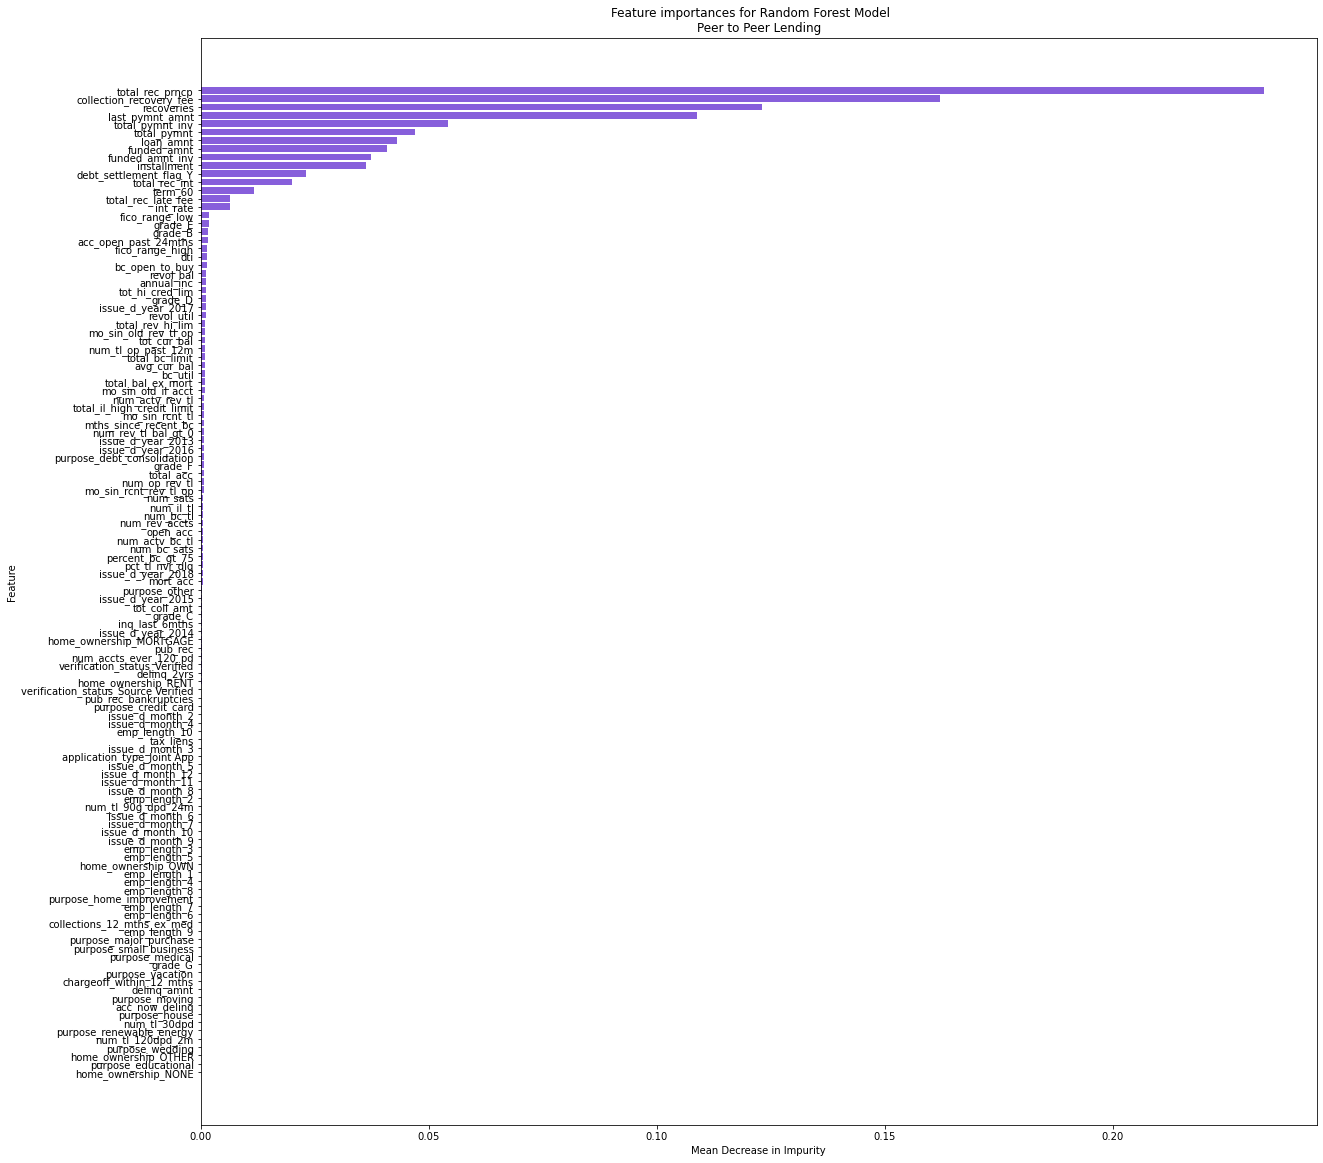

<Figure size 432x288 with 0 Axes>

In [124]:
variable_importance_plot(importances_rf, indices_rf, names_index)

In [125]:
df_model = data_final[['collection_recovery_fee','recoveries','total_rec_prncp','last_pymnt_amnt','total_pymnt','total_pymnt_inv','funded_amnt_inv','funded_amnt','loan_amnt',
'installment','debt_settlement_flag_Y','term_60','total_rec_int','int_rate','total_rec_late_fee','dti','grade_E','grade_D','fico_range_high','fico_range_low',
'revol_bal','grade_F','tot_hi_cred_lim','total_rev_hi_lim','bc_open_to_buy','annual_inc','acc_open_past_24mths','tot_cur_bal','mo_sin_old_rev_tl_op','avg_cur_bal']]

In [126]:
df_model.head()

,collection_recovery_fee,recoveries,total_rec_prncp,last_pymnt_amnt,total_pymnt,total_pymnt_inv,funded_amnt_inv,funded_amnt,loan_amnt,installment,...,revol_bal,grade_F,tot_hi_cred_lim,total_rev_hi_lim,bc_open_to_buy,annual_inc,acc_open_past_24mths,tot_cur_bal,mo_sin_old_rev_tl_op,avg_cur_bal
0,0.0,0.0,3600.0,122.67,4421.72,4421.72,3600.0,3600.0,3600.0,123.03,...,2765.0,0,178050.0,9300.0,1506.0,55000.0,4.0,144904.0,128.0,20701.0
1,0.0,0.0,24700.0,926.35,25679.66,25679.66,24700.0,24700.0,24700.0,820.28,...,21470.0,0,314017.0,111800.0,57830.0,65000.0,4.0,204396.0,192.0,9733.0
2,0.0,0.0,20000.0,15813.30,22705.92,22705.92,20000.0,20000.0,20000.0,432.66,...,7869.0,0,218418.0,14000.0,2737.0,63000.0,6.0,189699.0,184.0,31617.0
3,0.0,0.0,10400.0,10128.96,11740.50,11740.50,10400.0,10400.0,10400.0,289.91,...,21929.0,1,439570.0,34000.0,4567.0,104433.0,10.0,331730.0,210.0,27644.0
4,0.0,0.0,11950.0,7653.56,13708.95,13708.95,11950.0,11950.0,11950.0,405.18,...,8822.0,0,16900.0,12900.0,844.0,34000.0,0.0,12798.0,54.0,2560.0


## Train-Test Split

In [127]:
X = df_model
y = tar_replace

In [128]:
X.head()

,collection_recovery_fee,recoveries,total_rec_prncp,last_pymnt_amnt,total_pymnt,total_pymnt_inv,funded_amnt_inv,funded_amnt,loan_amnt,installment,...,revol_bal,grade_F,tot_hi_cred_lim,total_rev_hi_lim,bc_open_to_buy,annual_inc,acc_open_past_24mths,tot_cur_bal,mo_sin_old_rev_tl_op,avg_cur_bal
0,0.0,0.0,3600.0,122.67,4421.72,4421.72,3600.0,3600.0,3600.0,123.03,...,2765.0,0,178050.0,9300.0,1506.0,55000.0,4.0,144904.0,128.0,20701.0
1,0.0,0.0,24700.0,926.35,25679.66,25679.66,24700.0,24700.0,24700.0,820.28,...,21470.0,0,314017.0,111800.0,57830.0,65000.0,4.0,204396.0,192.0,9733.0
2,0.0,0.0,20000.0,15813.30,22705.92,22705.92,20000.0,20000.0,20000.0,432.66,...,7869.0,0,218418.0,14000.0,2737.0,63000.0,6.0,189699.0,184.0,31617.0
3,0.0,0.0,10400.0,10128.96,11740.50,11740.50,10400.0,10400.0,10400.0,289.91,...,21929.0,1,439570.0,34000.0,4567.0,104433.0,10.0,331730.0,210.0,27644.0
4,0.0,0.0,11950.0,7653.56,13708.95,13708.95,11950.0,11950.0,11950.0,405.18,...,8822.0,0,16900.0,12900.0,844.0,34000.0,0.0,12798.0,54.0,2560.0


In [129]:
y.value_counts()

0    889993
1    213475
Name: loan_status, dtype: int64

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [132]:
print('X_train :',X_train.shape)
print('X_test :',X_test.shape)
print('y_train :',y_train.shape)
print('y_test :',y_test.shape)

X_train : (772427, 30)
X_test : (331041, 30)
y_train : (772427,)
y_test : (331041,)


## Standard Scaling :

In [133]:
from sklearn.preprocessing import StandardScaler

In [134]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

## **Logistic Regression**

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,classification_report,auc

In [136]:
lr = LogisticRegression(random_state=0,max_iter=400)
lr.fit(X_train_sc,y_train)
y_pred_train = lr.predict(X_train_sc)
y_prob_train = lr.predict_proba(X_train_sc)[:,1]
lr_acc_train = accuracy_score(y_train,y_pred_train)
print('Logistic Regression Train Accuracy :',lr_acc_train)

y_pred_test = lr.predict(X_test_sc)
y_prob_test=lr.predict_proba(X_test_sc)[:,1]
lr_acc_test = accuracy_score(y_test,y_pred_test)
print('Logistic Regression Test Accuracy :',lr_acc_test)

Logistic Regression Train Accuracy : 0.998797297349782
Logistic Regression Test Accuracy : 0.9988762721233926


In [137]:
print('Logisitic Regression Model','\n')
print('Confusion_matrix :','\n',confusion_matrix(y_test,y_pred_test),'\n')
print('Classification Report :','\n',classification_report(y_test,y_pred_test),'\n')
print('ROC_AUC score :',roc_auc_score(y_test,y_pred_test))

Logisitic Regression Model 

Confusion_matrix : 
 [[266741      7]
 [   365  63928]] 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    266748
           1       1.00      0.99      1.00     64293

    accuracy                           1.00    331041
   macro avg       1.00      1.00      1.00    331041
weighted avg       1.00      1.00      1.00    331041
 

ROC_AUC score : 0.9971483118172965


In [138]:
data_prob=pd.DataFrame([y_test.values,y_prob_test]).T

In [139]:
data_prob.columns=['y','y_prob']
data_prob.head()

,y,y_prob
0,0.0,1.243595e-08
1,1.0,1.000000e+00
2,1.0,1.000000e+00
3,0.0,7.496175e-04
4,0.0,6.066346e-03


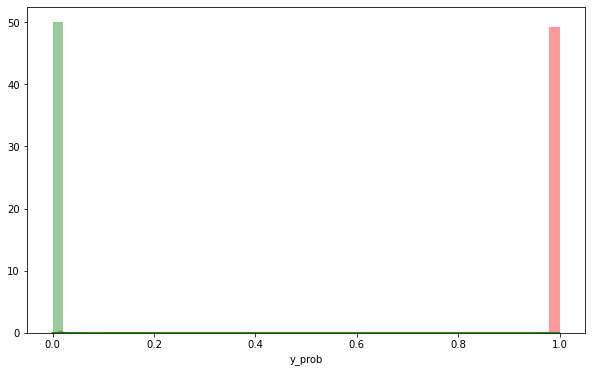

In [140]:
plt.figure(figsize=(10,6))
sns.distplot(data_prob['y_prob'][data_prob['y']==0],color='g')
sns.distplot(data_prob['y_prob'][data_prob['y']==1],color='r')
plt.show()

## **Random Forest Model**

In [141]:
from sklearn.ensemble import RandomForestClassifier

In [142]:
rf = RandomForestClassifier(n_estimators=50, max_depth=10)
rf.fit(X_train_sc,y_train)
y_pred_train_rf = rf.predict(X_train_sc)
y_pred_test_rf = rf.predict(X_test_sc)
rf_acc_train = accuracy_score(y_train,y_pred_train_rf)
print('Random Forest Train Accuracy :',rf_acc_train)
rf_acc_test = accuracy_score(y_test,y_pred_test_rf)
print('Random Forest Test Accuracy :',rf_acc_test)

Random Forest Train Accuracy : 0.9936239929469063
Random Forest Test Accuracy : 0.9933633598255202


In [143]:
pred_prob_rf = rf.predict_proba(X_test_sc)[:,1]
fpr2 , tpr2, _ = roc_curve(y_test,pred_prob_rf,pos_label=1)

In [144]:
auc_rf = auc(fpr2,tpr2)

In [145]:
print('Random Forest Model','\n')
print('Confusion_matrix :','\n',confusion_matrix(y_test,y_pred_test_rf),'\n')
print('Classification Report :','\n',classification_report(y_test,y_pred_test_rf),'\n')
print('ROC_AUC score :',roc_auc_score(y_test,y_pred_test_rf))

Random Forest Model 

Confusion_matrix : 
 [[266746      2]
 [  2195  62098]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    266748
           1       1.00      0.97      0.98     64293

    accuracy                           0.99    331041
   macro avg       1.00      0.98      0.99    331041
weighted avg       0.99      0.99      0.99    331041
 

ROC_AUC score : 0.9829259635537725


## **Decision Tree Model**

In [146]:
from sklearn.tree import DecisionTreeClassifier

In [147]:
dt = DecisionTreeClassifier()
dt.fit(X_train_sc,y_train)
y_pred_train_dt = dt.predict(X_train_sc)
y_pred_test_dt = dt.predict(X_test_sc)
dt_acc_train = accuracy_score(y_train,y_pred_train_dt)
print('Descision Tree Train Accuracy :',dt_acc_train)
dt_acc_test = accuracy_score(y_test,y_pred_test_dt)
print('Descision Tree Test Accuracy :',dt_acc_test)

Descision Tree Train Accuracy : 1.0
Descision Tree Test Accuracy : 0.9989940823040047


In [148]:
print('Descision Tree Model','\n')
print('Confusion_matrix :','\n',confusion_matrix(y_test,y_pred_test_rf),'\n')
print('Classification Report :','\n',classification_report(y_test,y_pred_test_rf),'\n')
print('ROC_AUC score :',roc_auc_score(y_test,y_pred_test_rf))

Descision Tree Model 

Confusion_matrix : 
 [[266746      2]
 [  2195  62098]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    266748
           1       1.00      0.97      0.98     64293

    accuracy                           0.99    331041
   macro avg       1.00      0.98      0.99    331041
weighted avg       0.99      0.99      0.99    331041
 

ROC_AUC score : 0.9829259635537725


## **Naives Bayes Model**

In [149]:
from sklearn.naive_bayes import GaussianNB

In [150]:
gnb = GaussianNB()
gnb.fit(X_train_sc,y_train)
y_pred_train_gnb = gnb.predict(X_train_sc)
y_pred_test_gnb = gnb.predict(X_test_sc)
gnb_acc_train = accuracy_score(y_train,y_pred_train_gnb)
print('Naive Bayes Train Accuracy :',gnb_acc_train)
gnb_acc_test = accuracy_score(y_test,y_pred_test_gnb)
print('Naive Bayes Test Accuracy :',gnb_acc_test)

Naive Bayes Train Accuracy : 0.943566188131694
Naive Bayes Test Accuracy : 0.9432366383620155


In [151]:
print('Naive Bayes Model','\n')
print('Confusion_matrix :','\n',confusion_matrix(y_test,y_pred_test_gnb),'\n')
print('Classification Report :','\n',classification_report(y_test,y_pred_test_gnb),'\n')
print('ROC_AUC score :',roc_auc_score(y_test,y_pred_test_gnb))

Naive Bayes Model 

Confusion_matrix : 
 [[266360    388]
 [ 18403  45890]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97    266748
           1       0.99      0.71      0.83     64293

    accuracy                           0.94    331041
   macro avg       0.96      0.86      0.90    331041
weighted avg       0.95      0.94      0.94    331041
 

ROC_AUC score : 0.8561544974408302


In [152]:
accuracy = pd.DataFrame({'Logistic Regression':[lr_acc_train, lr_acc_test], 'Random Forest':[rf_acc_train, rf_acc_test],
                         'Decision Tree':[dt_acc_train,dt_acc_test],'Naive Bayes':[gnb_acc_train,gnb_acc_test]}, index = ['Train','Test'])
accuracy

,Logistic Regression,Random Forest,Decision Tree,Naive Bayes
Train,0.998797,0.993624,1.000000,0.943566
Test,0.998876,0.993363,0.998994,0.943237


## Standard Scaling :

In [153]:
X = df_model
y = tar_replace

In [154]:
from sklearn.preprocessing import StandardScaler

In [155]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

## **Cross Validation for all models :**

In [156]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold

In [157]:
clf1 = LogisticRegression(max_iter = 300)
clf2 = DecisionTreeClassifier(random_state=42)
clf3 = RandomForestClassifier(random_state=42)
clf4 = GaussianNB()
clf5 = XGBClassifier(random_state=42)

In [158]:
kf = KFold(n_splits=5,shuffle=True,random_state=42)

In [159]:
for i,j in zip([clf1,clf2,clf3,clf4,clf5],['LR','DT','RF','GNB','XGB']):
    score = cross_val_score(i, X_scaled, y, cv = kf, scoring = 'accuracy')
    print('Accuracy Score :')
    print(j,':','Bias Error :',np.mean(score),',','Variance Error :',np.std(score)/np.mean(score))

Accuracy Score :
LR : Bias Error : 0.9988472705056598 , Variance Error : 6.521241546464274e-05
Accuracy Score :
DT : Bias Error : 0.9990140175595504 , Variance Error : 4.5502771039015376e-05
Accuracy Score :
RF : Bias Error : 0.9990856100930726 , Variance Error : 2.9448137103179978e-05
Accuracy Score :
GNB : Bias Error : 0.9434328861656256 , Variance Error : 0.0004389770586257387
Accuracy Score :
XGB : Bias Error : 0.999702755264793 , Variance Error : 2.758563870683772e-05


In [197]:
pd.DataFrame({('Accuracy','Bias Error') : [0.9988472705056598 ,0.9990140175595504,0.9990856100930726,0.9434328861656256,0.999702755264793],
            ('Accuracy','Variance Error'): [6.521241546464274e-05,4.5502771039015376e-05,2.9448137103179978e-05,0.0004389770586257387,2.758563870683772e-05]},
             index=['LR','DT','RF','GNB','XGB'])

Accuracy               
    Bias Error Variance Error
LR    0.998847       0.000065
DT    0.999014       0.000046
RF    0.999086       0.000029
GNB   0.943433       0.000439
XGB   0.999703       0.000028

In [199]:
for i,j in zip([clf1,clf2,clf3,clf4,clf5],['LR','DT','RF','GNB','XGB']):
    score = cross_val_score(i, X_scaled, y, cv = kf, scoring = 'recall')
    print('Recall :')
    print(j,':','Bias Error :',np.mean(score),',','Variance Error :',np.std(score)/np.mean(score))

Recall :
LR : Bias Error : 0.9940867981959529 , Variance Error : 0.0003945153700324349
Recall :
DT : Bias Error : 0.9973201578509683 , Variance Error : 0.00023385534937096344
Recall :
RF : Bias Error : 0.9952871118035584 , Variance Error : 0.00016817635702696276
Recall :
GNB : Bias Error : 0.7132153257500363 , Variance Error : 0.00238458780772248
Recall :
XGB : Bias Error : 0.998467978215704 , Variance Error : 0.0001532570169810373


In [195]:
pd.DataFrame({('Recall','Bias Error') : [0.9940867981959529 ,0.9973201578509683,0.9952871118035584,0.7132153257500363,0.998467978215704],
            ('Recall','Variance Error'): [0.0003945153700324349,0.00023385534937096344,0.00016817635702696276,0.00238458780772248,0.0001532570169810373]},
             index=['LR','DT','RF','GNB','XGB'])

Recall               
    Bias Error Variance Error
LR    0.994087       0.000395
DT    0.997320       0.000234
RF    0.995287       0.000168
GNB   0.713215       0.002385
XGB   0.998468       0.000153

In [161]:
for i,j in zip([clf1,clf2,clf3,clf4,clf5],['LR','DT','RF','GNB','XGB']):
    score = cross_val_score(i, X_scaled, y, cv = kf, scoring = 'roc_auc')
    print('ROC_AUC Score :')
    print(j,':','Bias Error :',np.mean(score),',','Variance Error :',np.std(score)/np.mean(score))

ROC_AUC Score :
LR : Bias Error : 0.99980848681393 , Variance Error : 7.883403955539815e-05
ROC_AUC Score :
DT : Bias Error : 0.9983701863822926 , Variance Error : 0.00011354006767740006
ROC_AUC Score :
RF : Bias Error : 0.9999268869649551 , Variance Error : 2.3763266195790724e-05
ROC_AUC Score :
GNB : Bias Error : 0.9794098799794753 , Variance Error : 0.0003323144189661044
ROC_AUC Score :
XGB : Bias Error : 0.9999290326751465 , Variance Error : 2.7897213167781818e-05


In [198]:
pd.DataFrame({('ROC_AUC','Bias Error') : [0.99980848681393 ,0.9983701863822926,0.9999268869649551,0.9794098799794753,0.9999290326751465],
            ('ROC_AUC','Variance Error'): [7.883403955539815e-05,0.00011354006767740006,2.3763266195790724e-05,0.0003323144189661044,2.7897213167781818e-05]},
             index=['LR','DT','RF','GNB','XGB'])

ROC_AUC               
    Bias Error Variance Error
LR    0.999808       0.000079
DT    0.998370       0.000114
RF    0.999927       0.000024
GNB   0.979410       0.000332
XGB   0.999929       0.000028

# Model Building by taking samples :

## Taking a sample 

In [255]:
df1 = pd.read_csv('D:/Capstone/Loan/Accepted_loan_with_85cols.csv')
df1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,...,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,...,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
2,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,...,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N
3,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,...,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N
4,11950.0,11950.0,11950.0,36 months,13.44,405.18,C,C3,Veterinary Tecnician,4 years,...,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0,N,Cash,N


In [256]:
df_sample = df1.sample(n=10000)
df_sample.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
436936,5000.0,5000.0,5000.0,36 months,12.73,167.83,B,B5,Accounts Receivable Specialist,< 1 year,...,20.0,1.0,0.0,42384.0,19622.0,18500.0,19484.0,N,DirectPay,N
644864,12000.0,12000.0,12000.0,60 months,23.43,341.26,F,F1,Dispatcher/Jail Matron,4 years,...,100.0,0.0,0.0,147196.0,157389.0,1700.0,140994.0,N,Cash,N
246567,1200.0,1200.0,1200.0,36 months,16.55,42.52,D,D2,Veterinary Assistant,1 year,...,0.0,0.0,0.0,21150.0,13387.0,4400.0,16250.0,N,Cash,N
70209,3500.0,3500.0,3500.0,36 months,13.99,119.61,C,C4,Driver,1 year,...,57.1,0.0,0.0,27500.0,13961.0,11800.0,12000.0,N,Cash,N
1028199,2500.0,2500.0,2500.0,36 months,11.99,83.03,B,B5,School Psychologist,2 years,...,0.0,1.0,0.0,239121.0,251359.0,17400.0,219621.0,N,Cash,N


In [257]:
df1['loan_status'].value_counts(normalize=True)*100

Fully Paid     80.654174
Charged Off    19.345826
Name: loan_status, dtype: float64

In [258]:
df_sample['loan_status'].value_counts(normalize=True)*100

Fully Paid     81.02
Charged Off    18.98
Name: loan_status, dtype: float64

## Checking if the sample represents the population

### ***Numerical Values of Main dataset :***

In [259]:
df_num = df1.select_dtypes(include=np.number)
df_num.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,3600.0,3600.0,3600.0,13.99,123.03,55000.0,5.91,0.0,675.0,679.0,...,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0
1,24700.0,24700.0,24700.0,11.99,820.28,65000.0,16.06,1.0,715.0,719.0,...,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0
2,20000.0,20000.0,20000.0,10.78,432.66,63000.0,10.78,0.0,695.0,699.0,...,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0
3,10400.0,10400.0,10400.0,22.45,289.91,104433.0,25.37,1.0,695.0,699.0,...,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0
4,11950.0,11950.0,11950.0,13.44,405.18,34000.0,10.20,0.0,690.0,694.0,...,0.0,0.0,100.0,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0


### ***Numerical Values of Sample :***

In [261]:
df_sample_num = df_sample.select_dtypes(include=np.number)
df_sample_num.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
436936,5000.0,5000.0,5000.0,12.73,167.83,50000.0,19.61,0.0,670.0,674.0,...,0.0,5.0,100.0,20.0,1.0,0.0,42384.0,19622.0,18500.0,19484.0
644864,12000.0,12000.0,12000.0,23.43,341.26,40000.0,27.04,0.0,675.0,679.0,...,0.0,6.0,93.3,100.0,0.0,0.0,147196.0,157389.0,1700.0,140994.0
246567,1200.0,1200.0,1200.0,16.55,42.52,40000.0,9.06,1.0,660.0,664.0,...,1.0,4.0,72.7,0.0,0.0,0.0,21150.0,13387.0,4400.0,16250.0
70209,3500.0,3500.0,3500.0,13.99,119.61,32000.0,38.03,7.0,660.0,664.0,...,7.0,2.0,69.6,57.1,0.0,0.0,27500.0,13961.0,11800.0,12000.0
1028199,2500.0,2500.0,2500.0,11.99,83.03,75000.0,23.17,0.0,665.0,669.0,...,0.0,2.0,100.0,0.0,1.0,0.0,239121.0,251359.0,17400.0,219621.0


### ***Independent T Test :***

In [262]:
stat,pval = stats.ttest_ind(df_num,df_sample_num)
print(pval)

[0.21758549 0.21760739 0.21739731 0.9092774  0.41309822 0.84887768
 0.58008327 0.66558923 0.84534997 0.845282   0.51092281 0.62428416
 0.09058153 0.16571986 0.47002789 0.95173262        nan        nan
 0.87138959 0.87186777 0.78324577 0.66930041 0.48126615 0.72839973
 0.45481955 0.03278119 0.44412498 0.57937762 0.90340112 0.78571663
 0.38128465 0.88230934 0.79057412 0.59657779 0.73952287 0.00918363
 0.88853464 0.55011635 0.62322388 0.77359169 0.63588449 0.35984902
 0.96214263 0.06801581 0.756725   0.42833564 0.6536093  0.64171248
 0.91450563 0.66035406 0.83149053 0.39350028 0.60977124 0.56890378
 0.10147516 0.43945396 0.68342845 0.69784787 0.40348325 0.24198476
 0.39580934 0.83877917 0.86996573 0.84762679 0.50894562]


In [263]:
pval_df = pd.DataFrame(data=pval,index = df_num.columns)
pval_df.sort_values(by=0,ascending=True)

,0
chargeoff_within_12_mths,0.009184
last_pymnt_amnt,0.032781
num_accts_ever_120_pd,0.068016
pub_rec,0.090582
num_tl_30dpd,0.101475
revol_bal,0.165720
funded_amnt_inv,0.217397
loan_amnt,0.217585
funded_amnt,0.217607
pub_rec_bankruptcies,0.241985


<b><i> Most values are above 0.05 and hence the sample represents the population except avg_cur_bal and bc_util

## Data Information :

In [216]:
print(df_sample.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 264671 to 453451
Data columns (total 85 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   50000 non-null  float64
 1   funded_amnt                 50000 non-null  float64
 2   funded_amnt_inv             50000 non-null  float64
 3   term                        50000 non-null  object 
 4   int_rate                    50000 non-null  float64
 5   installment                 50000 non-null  float64
 6   grade                       50000 non-null  object 
 7   sub_grade                   50000 non-null  object 
 8   emp_title                   50000 non-null  object 
 9   emp_length                  50000 non-null  object 
 10  home_ownership              50000 non-null  object 
 11  annual_inc                  50000 non-null  float64
 12  verification_status         50000 non-null  object 
 13  issue_d                  

## Data Preprocessing :

### ***Numerical :***

In [264]:
df_sample_num = df_sample.select_dtypes(include=np.number)
df_sample_num.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
436936,5000.0,5000.0,5000.0,12.73,167.83,50000.0,19.61,0.0,670.0,674.0,...,0.0,5.0,100.0,20.0,1.0,0.0,42384.0,19622.0,18500.0,19484.0
644864,12000.0,12000.0,12000.0,23.43,341.26,40000.0,27.04,0.0,675.0,679.0,...,0.0,6.0,93.3,100.0,0.0,0.0,147196.0,157389.0,1700.0,140994.0
246567,1200.0,1200.0,1200.0,16.55,42.52,40000.0,9.06,1.0,660.0,664.0,...,1.0,4.0,72.7,0.0,0.0,0.0,21150.0,13387.0,4400.0,16250.0
70209,3500.0,3500.0,3500.0,13.99,119.61,32000.0,38.03,7.0,660.0,664.0,...,7.0,2.0,69.6,57.1,0.0,0.0,27500.0,13961.0,11800.0,12000.0
1028199,2500.0,2500.0,2500.0,11.99,83.03,75000.0,23.17,0.0,665.0,669.0,...,0.0,2.0,100.0,0.0,1.0,0.0,239121.0,251359.0,17400.0,219621.0


### ***Scaling :***

loan_amnt  Skewness: 0.7376535064390027


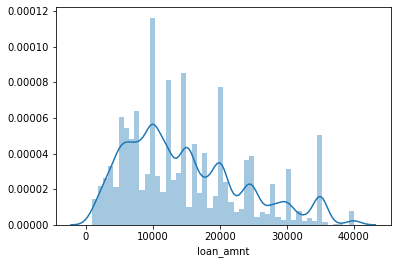

funded_amnt  Skewness: 0.7376535064390027


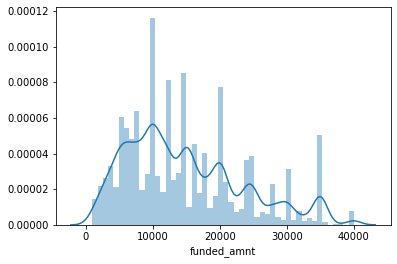

funded_amnt_inv  Skewness: 0.7378193727355982


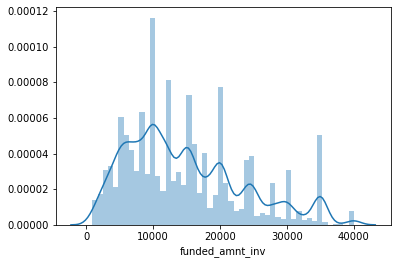

int_rate  Skewness: 0.7370770191624989


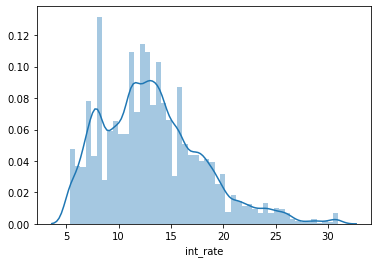

installment  Skewness: 0.9769885701234489


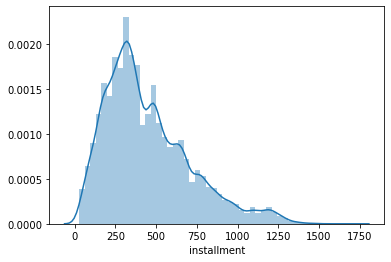

annual_inc  Skewness: 27.425313613513097


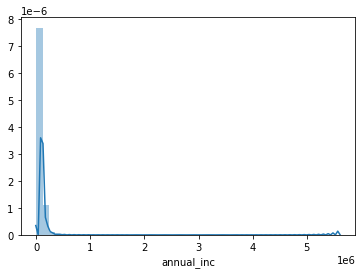

dti  Skewness: 11.374518978878978


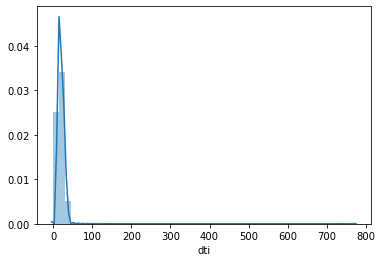

delinq_2yrs  Skewness: 5.531761303371284


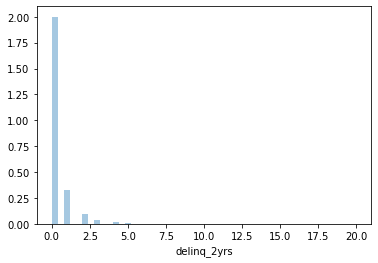

fico_range_low  Skewness: 1.3118697146322988


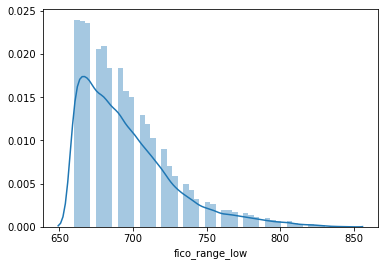

fico_range_high  Skewness: 1.3119561897552006


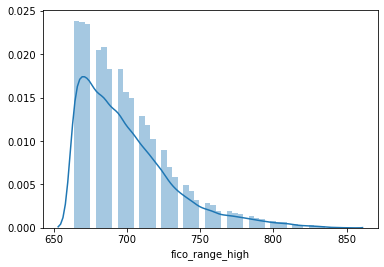

inq_last_6mths  Skewness: 1.6958626326691892


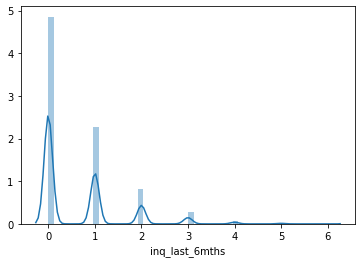

open_acc  Skewness: 1.2948546712016136


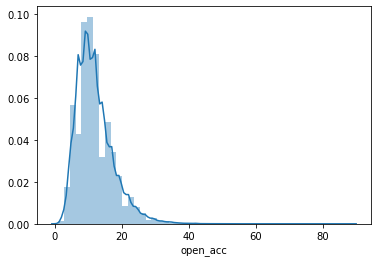

pub_rec  Skewness: 5.997514345339856


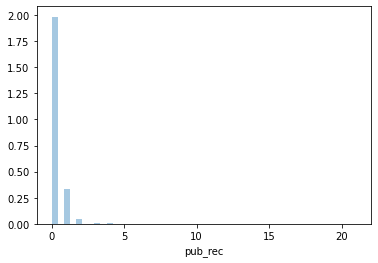

revol_bal  Skewness: 9.16865295667841


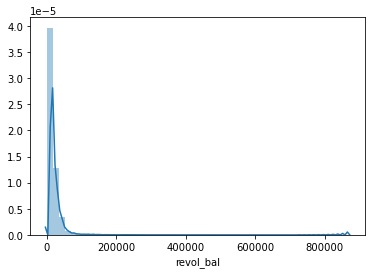

revol_util  Skewness: -0.0637825183834048


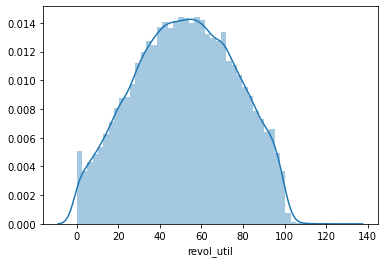

total_acc  Skewness: 0.9593335920307291


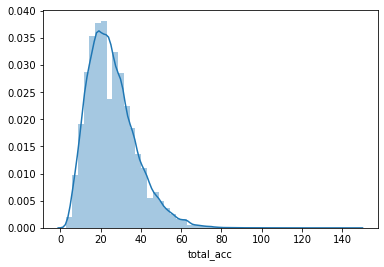

out_prncp  Skewness: 0


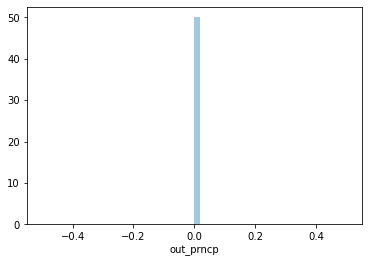

out_prncp_inv  Skewness: 0


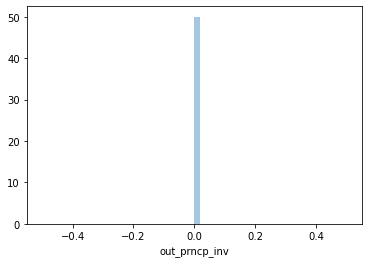

total_pymnt  Skewness: 0.9852092767566955


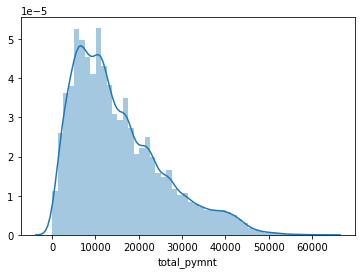

total_pymnt_inv  Skewness: 0.9852580298100917


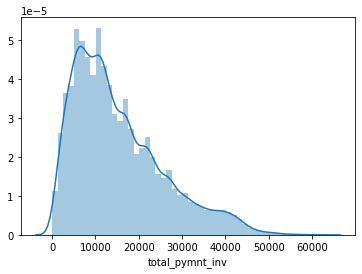

total_rec_prncp  Skewness: 0.8645528751256696


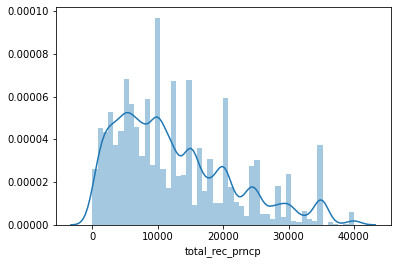

total_rec_int  Skewness: 2.546619300795768


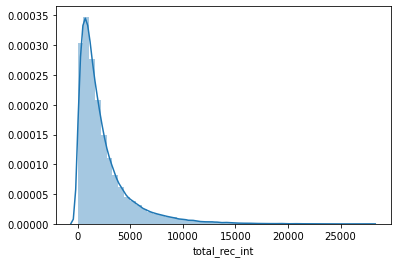

total_rec_late_fee  Skewness: 19.35840177858371


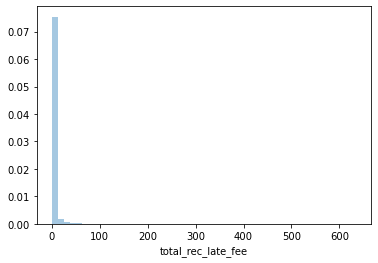

recoveries  Skewness: 8.317767149964187


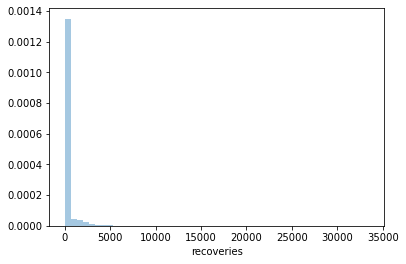

collection_recovery_fee  Skewness: 8.707182488012336


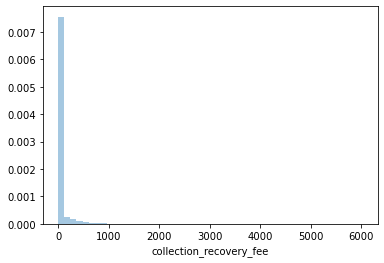

last_pymnt_amnt  Skewness: 1.7175606372859502


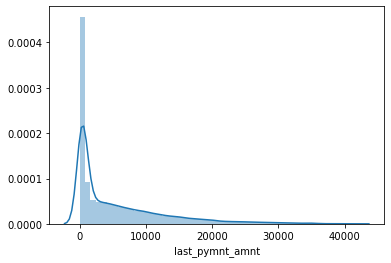

collections_12_mths_ex_med  Skewness: 10.375767630609984


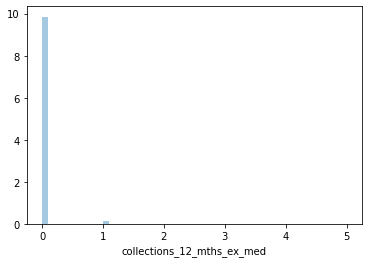

acc_now_delinq  Skewness: 21.27549990425117


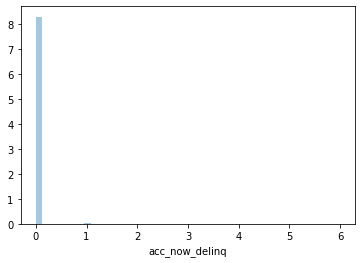

tot_coll_amt  Skewness: 128.44353646311865


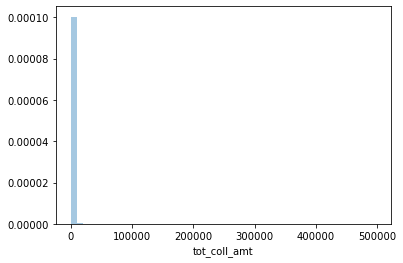

tot_cur_bal  Skewness: 2.588967474196741


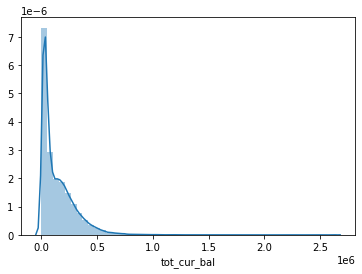

total_rev_hi_lim  Skewness: 5.497337618793427


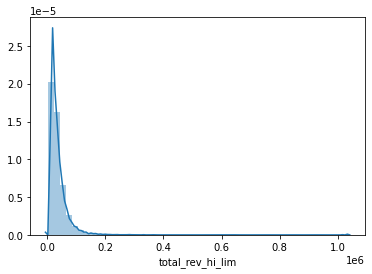

acc_open_past_24mths  Skewness: 1.3570100586592115


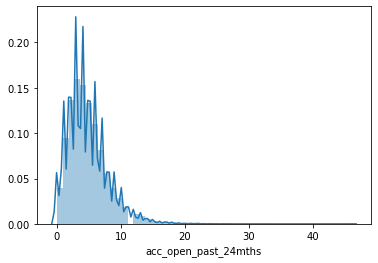

avg_cur_bal  Skewness: 3.473249853816761


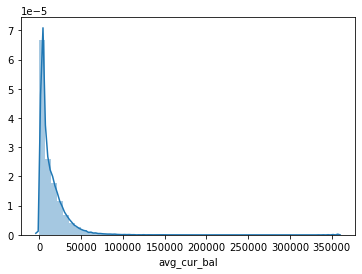

bc_open_to_buy  Skewness: 3.767101684832825


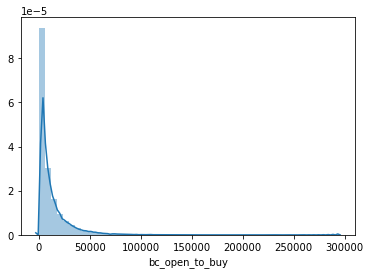

bc_util  Skewness: -0.3633982833470768


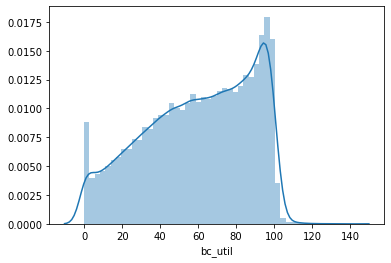

chargeoff_within_12_mths  Skewness: 16.185710667787212


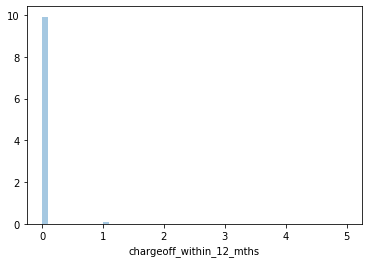

delinq_amnt  Skewness: 86.52369234208987


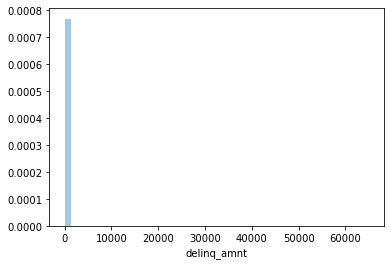

mo_sin_old_il_acct  Skewness: 0.3250376409443919


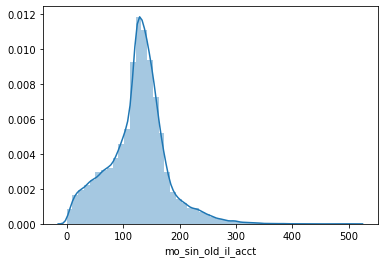

mo_sin_old_rev_tl_op  Skewness: 0.9894595244935802


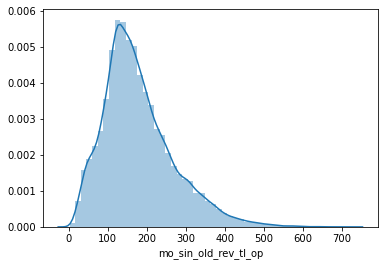

mo_sin_rcnt_rev_tl_op  Skewness: 3.174923268429306


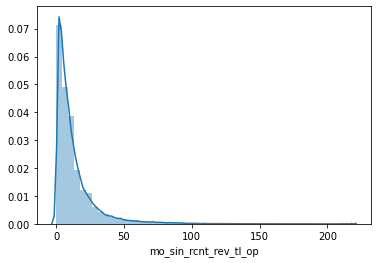

mo_sin_rcnt_tl  Skewness: 3.846496351884422


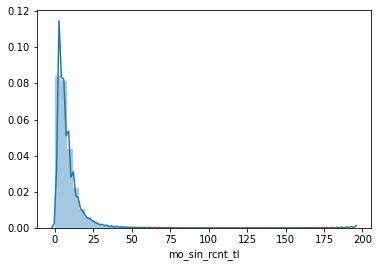

mort_acc  Skewness: 1.6085114685169308


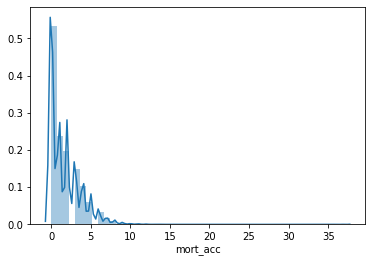

mths_since_recent_bc  Skewness: 3.25124566504623


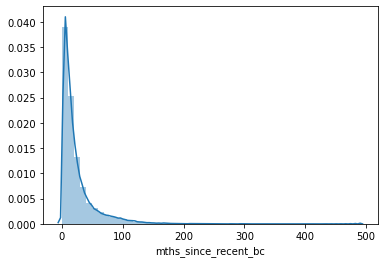

num_accts_ever_120_pd  Skewness: 4.874026961280438


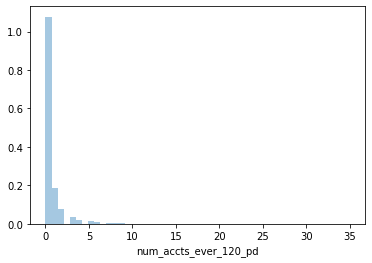

num_actv_bc_tl  Skewness: 1.3853649105749037


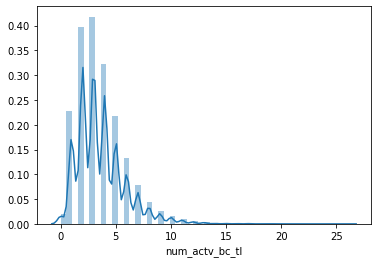

num_actv_rev_tl  Skewness: 1.4416721203666794


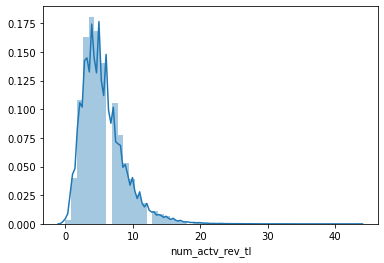

num_bc_sats  Skewness: 1.5005128361463693


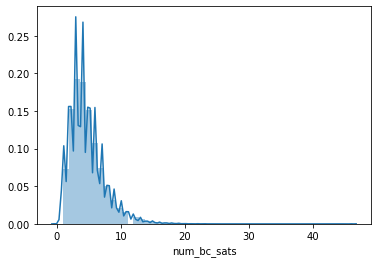

num_bc_tl  Skewness: 1.3252991795911215


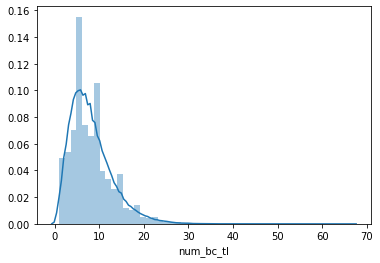

num_il_tl  Skewness: 2.01791688559243


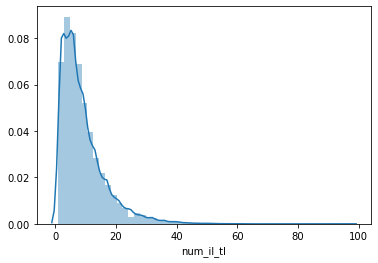

num_op_rev_tl  Skewness: 1.4381020849570958


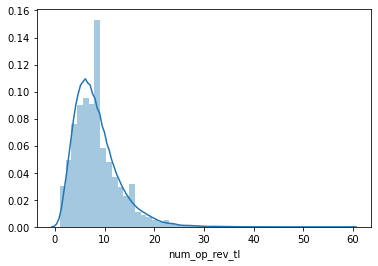

num_rev_accts  Skewness: 1.2682232750648395


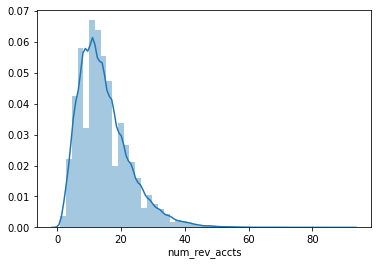

num_rev_tl_bal_gt_0  Skewness: 1.4452539473018768


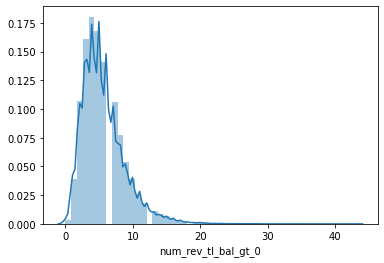

num_sats  Skewness: 1.295890684977726


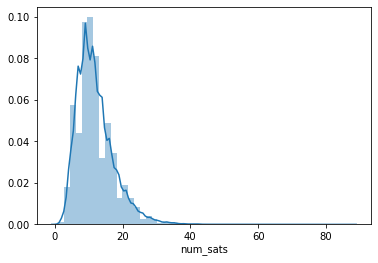

num_tl_120dpd_2m  Skewness: 79.06187992163296


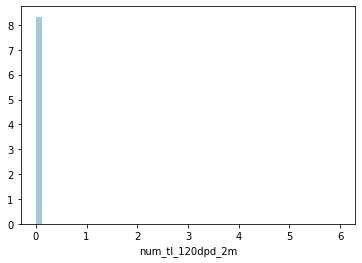

num_tl_30dpd  Skewness: 19.386093860081868


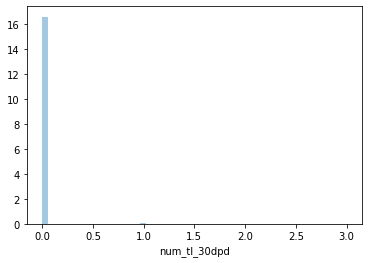

num_tl_90g_dpd_24m  Skewness: 12.942806848449273


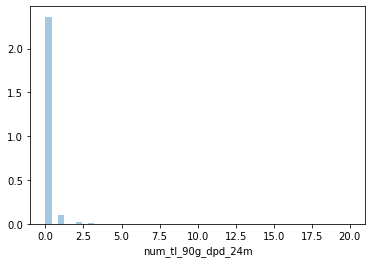

num_tl_op_past_12m  Skewness: 1.5386306171374913


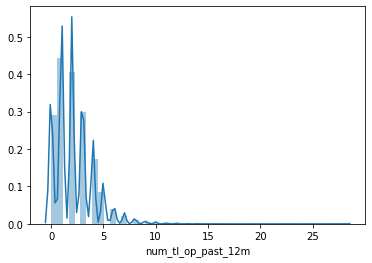

pct_tl_nvr_dlq  Skewness: -2.2509515643834668


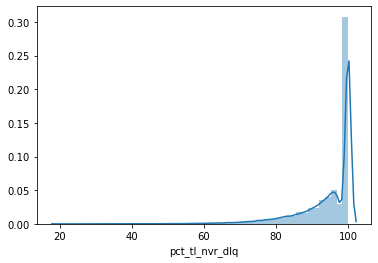

percent_bc_gt_75  Skewness: 0.2050342009577394


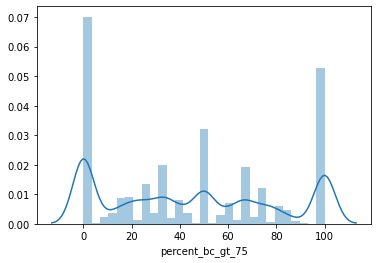

pub_rec_bankruptcies  Skewness: 3.4532016213662606


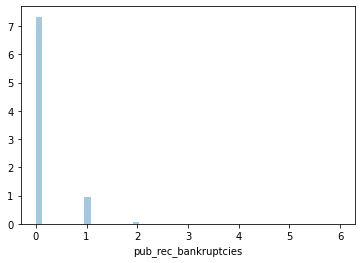

tax_liens  Skewness: 14.188864701627866


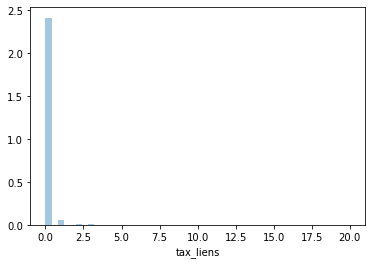

tot_hi_cred_lim  Skewness: 5.556969941442426


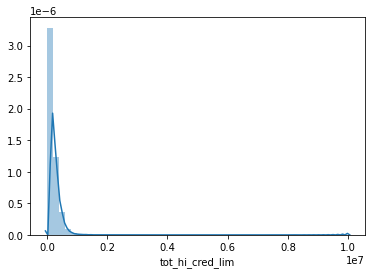

total_bal_ex_mort  Skewness: 3.3920059329085723


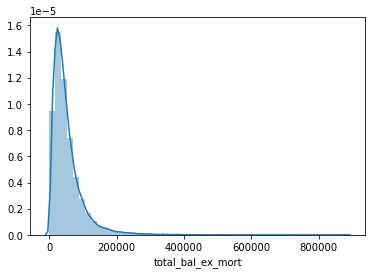

total_bc_limit  Skewness: 2.6552214823349116


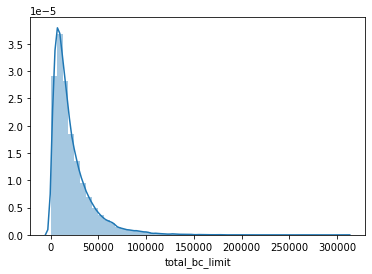

total_il_high_credit_limit  Skewness: 2.713665372068714


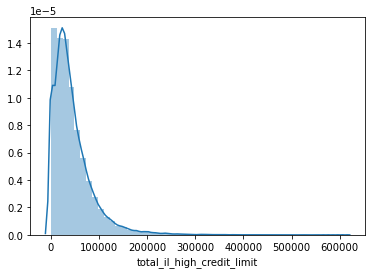

In [218]:
for i in df_sample_num.columns:
    print(i," Skewness:",df_sample_num[i].skew())
    sns.distplot(df_sample_num[i])
    plt.show()

### ***Categorical :***

In [265]:
df_sample_cat = df_sample.select_dtypes(include=np.object)
df_sample_cat.head()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type,hardship_flag,disbursement_method,debt_settlement_flag
436936,36 months,B,B5,Accounts Receivable Specialist,< 1 year,RENT,Not Verified,Aug-2018,Fully Paid,n,credit_card,MD,Oct-1988,w,Oct-2018,Mar-2019,Individual,N,DirectPay,N
644864,60 months,F,F1,Dispatcher/Jail Matron,4 years,RENT,Verified,Aug-2014,Charged Off,n,debt_consolidation,UT,Jan-2003,w,Jan-2015,Oct-2016,Individual,N,Cash,N
246567,36 months,D,D2,Veterinary Assistant,1 year,RENT,Not Verified,Apr-2015,Fully Paid,n,debt_consolidation,IN,Jul-2010,f,Mar-2017,Jul-2018,Individual,N,Cash,N
70209,36 months,C,C4,Driver,1 year,RENT,Source Verified,Oct-2015,Fully Paid,n,debt_consolidation,FL,Oct-2001,f,Dec-2016,Jul-2017,Individual,N,Cash,N
1028199,36 months,B,B5,School Psychologist,2 years,RENT,Not Verified,Dec-2017,Fully Paid,n,debt_consolidation,WA,Mar-1990,w,Apr-2018,Dec-2018,Individual,N,Cash,N


<b><i> Columns given below have no real impact. They will be dropped. 

In [266]:
df_sample_cat.drop(columns=['last_credit_pull_d','last_pymnt_d','earliest_cr_line',
                            'addr_state','sub_grade','issue_d','emp_title'],inplace=True)

<b><i> Separating loan_status for easy identification

In [267]:
loan_status = df_sample_cat['loan_status']
loan_status.replace({'Fully Paid':0,'Charged Off':1},inplace=True)
loan_status.head()

436936     0
644864     1
246567     0
70209      0
1028199    0
Name: loan_status, dtype: int64

In [268]:
loan_status.value_counts()

0    8102
1    1898
Name: loan_status, dtype: int64

### ***Get Dummies: One hot Encoding :***

In [269]:
df_sample_dummies = pd.get_dummies(df_sample_cat.drop(columns='loan_status'),drop_first=True)
df_sample_dummies.head()

,term_ 60 months,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_10+ years,emp_length_2 years,emp_length_3 years,...,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_Joint App,disbursement_method_DirectPay,debt_settlement_flag_Y
436936,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
644864,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
246567,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
70209,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1028199,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [271]:
df_final1 = pd.concat(objs=(df_sample_num,df_sample_dummies,loan_status),axis=1)
df_final1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_Joint App,disbursement_method_DirectPay,debt_settlement_flag_Y,loan_status
436936,5000.0,5000.0,5000.0,12.73,167.83,50000.0,19.61,0.0,670.0,674.0,...,0,0,0,0,0,1,0,1,0,0
644864,12000.0,12000.0,12000.0,23.43,341.26,40000.0,27.04,0.0,675.0,679.0,...,0,0,0,0,0,1,0,0,0,1
246567,1200.0,1200.0,1200.0,16.55,42.52,40000.0,9.06,1.0,660.0,664.0,...,0,0,0,0,0,0,0,0,0,0
70209,3500.0,3500.0,3500.0,13.99,119.61,32000.0,38.03,7.0,660.0,664.0,...,0,0,0,0,0,0,0,0,0,0
1028199,2500.0,2500.0,2500.0,11.99,83.03,75000.0,23.17,0.0,665.0,669.0,...,0,0,0,0,0,1,0,0,0,0


In [273]:
print("No.of rows:",df_final1.shape[0])
print("No.of Columns:",df_final1.shape[1])

No.of rows: 10000
No.of Columns: 104


## Independent and Dependent Variables 

In [274]:
x = df_final1.drop(columns='loan_status')
x.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_Joint App,disbursement_method_DirectPay,debt_settlement_flag_Y
436936,5000.0,5000.0,5000.0,12.73,167.83,50000.0,19.61,0.0,670.0,674.0,...,0,0,0,0,0,0,1,0,1,0
644864,12000.0,12000.0,12000.0,23.43,341.26,40000.0,27.04,0.0,675.0,679.0,...,0,0,0,0,0,0,1,0,0,0
246567,1200.0,1200.0,1200.0,16.55,42.52,40000.0,9.06,1.0,660.0,664.0,...,0,0,0,0,0,0,0,0,0,0
70209,3500.0,3500.0,3500.0,13.99,119.61,32000.0,38.03,7.0,660.0,664.0,...,0,0,0,0,0,0,0,0,0,0
1028199,2500.0,2500.0,2500.0,11.99,83.03,75000.0,23.17,0.0,665.0,669.0,...,0,0,0,0,0,0,1,0,0,0


In [275]:
y = df_final1['loan_status']
y.head()

436936     0
644864     1
246567     0
70209      0
1028199    0
Name: loan_status, dtype: int64

## Train-Test split :

In [276]:
from sklearn.model_selection import train_test_split 

In [278]:
xtrain_lr,xtest_lr,ytrain_lr,ytest_lr = train_test_split(x,y,test_size=0.3,random_state=0)

print('X_train :',xtrain_lr.shape)
print('X_test :',xtest_lr.shape)
print('y_train :',ytrain_lr.shape)
print('y_test :',ytest_lr.shape)

X_train : (7000, 103)
X_test : (3000, 103)
y_train : (7000,)
y_test : (3000,)


## Recursive feature Elimination 

In [279]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
rfe = RFECV(estimator = lr)
rfe_mod = rfe.fit(xtrain_lr,ytrain_lr)

In [280]:
rfe_mod.ranking_

array([  3,   2,   1,  39,  18,  30,  33,  77,  11,   7,  56,  45,  69,
        23,  24,  34, 102, 101,   5,   9,   1,   6,  13,   4,  12,  15,
        93,  97,  17,  27,  28,  61,  20,  25,   8,  94,  19,  14,  16,
        35,  32,  40,  29,  63,  49,  43,  46,  64,  37,  44,  38,  42,
        41,  98, 100,  75,  78,  10,  31,  67,  86,  22,  26,  21,  36,
        47,  51,  71,  99,  60,  73,  84,  57,  92,  70,  89,  74,  82,
        88,  68,  80,  58,  54,  72,  62,  53,  52,  55,  59,  76,  83,
        66,  81,  87,  65,  96,  79,  85,  90,  50,  91,  95,  48])

In [231]:
rank = pd.DataFrame()
rank['Feature'] = xtrain_lr.columns
rank['Rank'] = rfe_mod.ranking_

In [232]:
rank.sort_values(by='Rank',ascending=True)

,Feature,Rank
2,funded_amnt_inv,1
20,total_rec_prncp,1
1,funded_amnt,2
0,loan_amnt,3
21,total_rec_int,4
19,total_pymnt_inv,5
18,total_pymnt,6
23,recoveries,7
14,revol_util,8
37,mo_sin_old_il_acct,9


### ***Final Feature with RFECV:  :***

In [233]:
feat_rfe = rank[rank['Rank']==1]['Feature']
feat_rfe

2     funded_amnt_inv
20    total_rec_prncp
Name: Feature, dtype: object

In [234]:
xtrain_lr1 = xtrain_lr[feat_rfe]
xtrain_lr1.head()

,funded_amnt_inv,total_rec_prncp
562516,23200.0,23200.00
267122,19600.0,19600.00
895627,24000.0,24000.00
476542,8000.0,507.78
356252,20000.0,20000.00


In [235]:
xtest_lr1 = xtest_lr[feat_rfe]
xtest_lr1.head()

,funded_amnt_inv,total_rec_prncp
606187,2900.0,2900.00
215800,3500.0,3500.00
817863,7700.0,7700.00
732886,18000.0,7276.96
789472,26000.0,2815.77


## Transformation :

In [236]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
pt_xtrain_lr = pt.fit_transform(xtrain_lr)
pt_xtest_lr = pt.transform(xtest_lr)

## Scaling :

In [237]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain_lr_sc = sc.fit_transform(pt_xtrain_lr)
xtest_lr_sc = sc.transform(pt_xtest_lr)

## Logistic Regression Model :

In [238]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=300)

In [239]:
lr.fit(xtrain_lr_sc,ytrain_lr)

LogisticRegression(max_iter=300)

In [241]:
ypred_lr = lr.predict(xtest_lr_sc)

In [242]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score
print("Confusion Matrix:\n")
print(confusion_matrix(ytest_lr,ypred_lr))
print("Classification Report:\n")
print(classification_report(ytest_lr,ypred_lr))
print("Accuracy score:\n")
print(accuracy_score(ytest_lr,ypred_lr))
print("ROC_AUC:\n")
print(roc_auc_score(ytest_lr,ypred_lr))

Confusion Matrix:

[[12100     0]
 [   32  2868]]
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12100
           1       1.00      0.99      0.99      2900

    accuracy                           1.00     15000
   macro avg       1.00      0.99      1.00     15000
weighted avg       1.00      1.00      1.00     15000

Accuracy score:

0.9978666666666667
ROC_AUC:

0.9944827586206897


## Train-Test Split for significant features :

In [243]:
xtrain_rf,xtest_rf,ytrain_rf,ytest_rf = train_test_split(x,y,test_size=0.3,random_state=0)

In [244]:
xtrain_rf1 = xtrain_rf[feat_rfe]
xtrain_rf1.head()

,funded_amnt_inv,total_rec_prncp
562516,23200.0,23200.00
267122,19600.0,19600.00
895627,24000.0,24000.00
476542,8000.0,507.78
356252,20000.0,20000.00


In [245]:
xtest_rf1 = xtest_lr[feat_rfe]
xtest_rf1.head()

,funded_amnt_inv,total_rec_prncp
606187,2900.0,2900.00
215800,3500.0,3500.00
817863,7700.0,7700.00
732886,18000.0,7276.96
789472,26000.0,2815.77


## Random Forest with significant features :

In [246]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [247]:
rf.fit(xtrain_rf1,ytrain_lr)  

RandomForestClassifier()

In [248]:
ypred_rf = rf.predict(xtest_rf1)
ypred_rf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [249]:
print("METRICS: ")
print("Confusion Matrix:\n")
print(confusion_matrix(ytest_rf,ypred_rf))
print("Classification Report:\n")
print(classification_report(ytest_rf,ypred_rf))
print("Accuracy score:\n")
print(accuracy_score(ytest_rf,ypred_rf))
print("ROC_AUC:\n")
print(roc_auc_score(ytest_rf,ypred_rf))

METRICS: 
Confusion Matrix:

[[12100     0]
 [   12  2888]]
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12100
           1       1.00      1.00      1.00      2900

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000

Accuracy score:

0.9992
ROC_AUC:

0.9979310344827585


In [281]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
rfe = RFECV(estimator =rfc)
rfe_mod = rfe.fit(xtrain_lr,ytrain_lr)

In [282]:
rfe_mod.ranking_

array([  1,   7,   4,  11,   5,  17,  14,  59,  34,  23,  54,  40,  51,
        13,  15,  30,  98, 100,   3,   6,   1,   8,  12,   1,   1,   2,
        70,  86,  48,  33,  20,  24,  29,  19,  22,  87,  78,  25,  16,
        39,  37,  49,  31,  58,  46,  38,  44,  42,  36,  28,  35,  45,
        32,  99,  96,  82,  41,  47,  43,  60,  56,  26,  18,  27,  21,
        10,  52,  61,  53,  50,  55,  77,  68,  69,  63,  73,  74,  76,
        85,  88,  84,  75,  67,  71,  65,  64,  62,  66,  57,  80,  97,
        89,  91,  90,  79,  94,  81,  92,  95,  72,  83,  93,   9])